# Project 2. P2P  대출심사 알고리듬
**과목명:  응용데이터애널리틱스 (Applied Data Analytics)** \\
**학수번호:  INE4108** \\
**교강사:  송재욱 교수 (산업공학과)** \\
 \\
***

## 1. Environmental Set-up & Data Loading

In [1]:
from google.colab import drive
import pandas as pd
%matplotlib inline
pd.options.display.max_rows = 1000
import seaborn as sns
import missingno as msno 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Google Drive where you have saved the unzipped
FOLDERNAME =  'ADX/'

assert FOLDERNAME is not None, 'ERROR'

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../



Mounted at /content/drive
/content/drive/My Drive


In [2]:
# 모델 수립을 위한 Train/Validation Set
df = pd.read_csv('./ADX/Data_P2P/P2_dataset.csv', encoding ='cp949') 

# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('./ADX/Data_P2P/P2_dataset_test_sample.csv', encoding ='cp949') 

## 2. Modelling
- df를 사용하여 예측모형 수립
- 상세 사항은 업로드 된 비디오 참고

In [3]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,8000,8000,8000.0,0.1757,287.50,D,D2,10+ years,RENT,93000.0,Source Verified,Charged Off,debt_consolidation,12.66,1,1,9,0,4445,0.397,20,f,9603.60,9603.60,7160.74,2354.59,0.00,88.27,15.8886,287.50,0.0,0,0.0,0,0.0,0.0
1,31900,31900,31900.0,0.1335,1080.23,C,C2,10+ years,MORTGAGE,250000.0,Source Verified,Charged Off,other,0.63,0,2,10,7,4117,0.142,24,w,22219.17,22219.17,15031.10,5493.27,54.01,1640.79,295.3422,2214.47,0.0,0,0.0,0,0.0,7.0
2,1500,1500,1500.0,0.1757,53.91,D,D4,10+ years,MORTGAGE,60000.0,Verified,Charged Off,other,23.40,0,0,31,0,11606,0.835,66,f,1183.09,1183.09,821.76,361.33,0.00,0.00,0.0000,53.91,0.0,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,0.1777,360.38,D,D1,NaN,MORTGAGE,50000.0,Source Verified,Charged Off,debt_consolidation,3.50,0,2,7,1,4917,0.410,12,w,2883.04,2883.04,1789.05,1093.99,0.00,0.00,0.0000,360.38,0.0,0,0.0,0,1.0,0.0
4,24000,24000,24000.0,0.1849,873.57,D,D2,3 years,RENT,100000.0,Source Verified,Charged Off,credit_card,18.67,0,0,15,0,39227,0.956,29,f,19124.89,19124.89,12518.66,6555.19,43.68,7.36,0.0000,1258.98,0.0,0,0.0,0,0.0,0.0


In [4]:
df['loan_status'].value_counts()

Fully Paid     277970
Charged Off     41908
Name: loan_status, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319878 entries, 0 to 319877
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   319878 non-null  int64  
 1   funded_amnt                 319878 non-null  int64  
 2   funded_amnt_inv             319878 non-null  float64
 3   int_rate                    319878 non-null  float64
 4   installment                 319878 non-null  float64
 5   grade                       319878 non-null  object 
 6   sub_grade                   319878 non-null  object 
 7   emp_length                  303609 non-null  object 
 8   home_ownership              319878 non-null  object 
 9   annual_inc                  319878 non-null  float64
 10  verification_status         319878 non-null  object 
 11  loan_status                 319878 non-null  object 
 12  purpose                     319878 non-null  object 
 13  dti           

## 2.1 전처리

    ㅇ목차
    1. 변수 유형 파악 및 올바른 데이터 타입 설정
    2. Category 변수 처리
    3. EDA
    4. 이상치 처리
    5. Null Value 처리
    6. 파생변수 생성 및 차원 축소
    7. 스케일링


In [6]:
#변수형에 따라 전처리하기 위해 list 생성
categorical_var_list = ['grade'                         
,'sub_grade'     
,'emp_length'      
,'home_ownership'    
,'verification_status'
,'loan_status'           
,'purpose'  
,'initial_list_status'
]

numeric_var_list = [
'funded_amnt_inv',
 'delinq_amnt',
 'int_rate',
 'funded_amnt',
 'dti',
 'delinq_2yrs',
 'total_rec_late_fee',
 'total_acc',
 'tax_liens',
 'total_pymnt_inv',
 'loan_amnt',
 'open_acc',
 'acc_now_delinq',
 'annual_inc',
 'inq_last_6mths',
 'installment',
 'pub_rec',
 'pub_rec_bankruptcies',
 'total_rec_int',
 'last_pymnt_amnt',
 'recoveries',
 'collections_12_mths_ex_med',
 'revol_bal',
 'total_pymnt',
 'collection_recovery_fee',
 'revol_util',
 'chargeoff_within_12_mths',
 'total_rec_prncp'
]

missing_list = ['emp_length','revol_util','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies',
'tax_liens']

In [7]:
len(categorical_var_list)

8

In [8]:
len(numeric_var_list)

28

##1. 변수 유형 파악 및 올바른 데이터 타입 설정

In [9]:
def ChangeType(df_):
    #2-1 categoric, numeric
    for i in categorical_var_list:
           df_[i]=df_[i].astype('category', errors='ignore')
    for i in numeric_var_list:
           df_[i]=df_[i].astype('float64', errors='ignore')

    return df_

In [10]:
df1 = df.copy()
df1 = ChangeType(df1)
df1.dtypes

loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                    category
home_ownership                category
annual_inc                     float64
verification_status           category
loan_status                   category
purpose                       category
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status           category
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int            

##2. Category 변수 처리

In [11]:
for col in categorical_var_list:
    print(col)
    print(len(df[col].value_counts()))
    print(df[col].value_counts())
    print('-'*40)

# (변수명 , label 수)
# grade 7
# sub_grade 35
# emp_grade 11
# home_ownership 6 
# verification_stats 3
# y : loan_status 2 (Fully : 277970, Charged Off : 41908) 
# purpose 14
# initial_list_status _2

grade
7
B    114467
C     80320
A     69324
D     41369
E     11363
F      2772
G       263
Name: grade, dtype: int64
----------------------------------------
sub_grade
35
B3    26492
B4    24498
B2    22952
B5    20663
C1    20381
B1    19862
A5    19129
C2    18171
A4    17839
C3    15786
C4    13630
C5    12352
A3    11928
D1    11282
A2    10370
A1    10058
D2     9924
D3     8341
D4     6829
D5     4993
E1     3383
E2     2938
E3     2031
E4     1553
E5     1458
F1      995
F3      656
F2      573
F4      356
F5      192
G1      116
G2       71
G3       32
G4       26
G5       18
Name: sub_grade, dtype: int64
----------------------------------------
emp_length
11
10+ years    95962
2 years      29535
< 1 year     26135
3 years      26077
5 years      21608
1 year       21399
4 years      19869
6 years      18171
7 years      17778
8 years      15151
9 years      11924
Name: emp_length, dtype: int64
----------------------------------------
home_ownership
6
MORTGAGE    150325
RENT  

In [12]:
def cate_to_prob(data_):
    # y를 fully paid : 1 , charged off : 0 으로 바꾸어서 naive bayes 처럼 카테고리 값의 확률을 계산
    data_['loan_status'].replace(to_replace = {"Fully Paid" : 1.0,
                                          "Charged Off":0.0}, inplace = True)
    
    # 각 카테고리의 확률을 data frame에 저장
    df_subgrade = pd.DataFrame(data_.groupby(by = 'sub_grade')['loan_status'].mean())
    df_emplength = pd.DataFrame(data_.groupby(by = 'emp_length')['loan_status'].mean())
    df_homeownership = pd.DataFrame(data_.groupby(by = 'home_ownership')['loan_status'].mean())
    df_verification = pd.DataFrame(data_.groupby(by = 'verification_status')['loan_status'].mean())
    df_purpose = pd.DataFrame(data_.groupby(by = 'purpose')['loan_status'].mean())
    df_initial = pd.DataFrame(data_.groupby(by = 'initial_list_status')['loan_status'].mean())
    
    # 원래 카테고리 값을 확률 값으로 대체
    data_['sub_grade'] = data_['sub_grade'].replace(to_replace=df_subgrade['loan_status'])
    data_['emp_length'] = data_['emp_length'].replace(to_replace=df_emplength['loan_status'])
    data_['home_ownership'] = data_['home_ownership'].replace(to_replace=df_homeownership['loan_status'])
    data_['verification_status'] = data_['verification_status'].replace(to_replace=df_verification['loan_status'])
    data_['purpose'] = data_['purpose'].replace(to_replace=df_purpose['loan_status'])
    data_['initial_list_status'] = data_['initial_list_status'].replace(to_replace=df_initial['loan_status'])
    
    # subgrade 가 데이터를 더 자세히 표현해주므로 grade 컬럼 드랍
    data_.drop(['grade'], axis=1, inplace=True)

    #추후 np.sign 계산을 위해 fully paid : -1.0 , charged off : 1.0 label 값 변환
    data_['loan_status'].replace(to_replace = {1.0 : -1.0,
                                          0.0:1.0}, inplace = True)
    
    return data_, df_subgrade, df_emplength, df_homeownership, df_verification, df_purpose, df_initial




def cate_to_prob_test(data_, df_subgrade, df_emplength, df_homeownership, df_verification, df_purpose, df_initial):
    # y를 fully paid : 1 , charged off : 0 으로 바꾸어서 naive bayes 처럼 카테고리 값의 확률을 계산
    data_['loan_status'].replace(to_replace = {"Fully Paid" : 1.0,
                                          "Charged Off":0.0}, inplace = True)
    
    # train 에서의 확률을 test에서 사용
    
    # 원래 카테고리 값을 확률 값으로 대체
    data_['sub_grade'] = data_['sub_grade'].replace(to_replace=df_subgrade['loan_status'])
    data_['emp_length'] = data_['emp_length'].replace(to_replace=df_emplength['loan_status'])
    data_['home_ownership'] = data_['home_ownership'].replace(to_replace=df_homeownership['loan_status'])
    data_['verification_status'] = data_['verification_status'].replace(to_replace=df_verification['loan_status'])
    data_['purpose'] = data_['purpose'].replace(to_replace=df_purpose['loan_status'])
    data_['initial_list_status'] = data_['initial_list_status'].replace(to_replace=df_initial['loan_status'])
    
    # subgrade 가 데이터를 더 자세히 표현해주므로 grade 컬럼 드랍
    data_.drop(['grade'], axis=1, inplace=True)

    #추후 np.sign 계산을 위해 fully paid : -1.0 , charged off : 1.0 label 값 변환
    data_['loan_status'].replace(to_replace = {1.0 : -1.0,
                                          0.0:1.0}, inplace = True)
    
    return data_


In [13]:
df2 = df1.copy()
df2, df_subgrade, df_emplength, df_homeownership, df_verification, df_purpose, df_initial = cate_to_prob(df2)

##3. EDA


In [14]:
#시각화 함수
def plot_var(df, col_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    full_name = col_name
    
    # Plot without loan status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x='loan_status', y =col_name, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,1]
        sns.boxplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of df Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [15]:
df3 = df2.copy()
df3['loan_status'] = df3['loan_status'].astype('category')

In [16]:
#변수 시각화
import warnings
def dist_box_plot(df):
    plt.rcParams.update({'figure.max_open_warning': 0})
    warnings.simplefilter(action='ignore', category=FutureWarning)
    for i in df.columns:
        if (i == 'loan_status'):
            continue
        plot_var(df, i, continuous=True)            

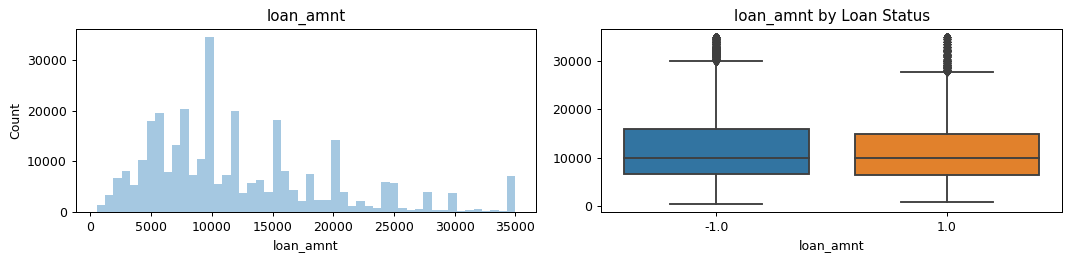

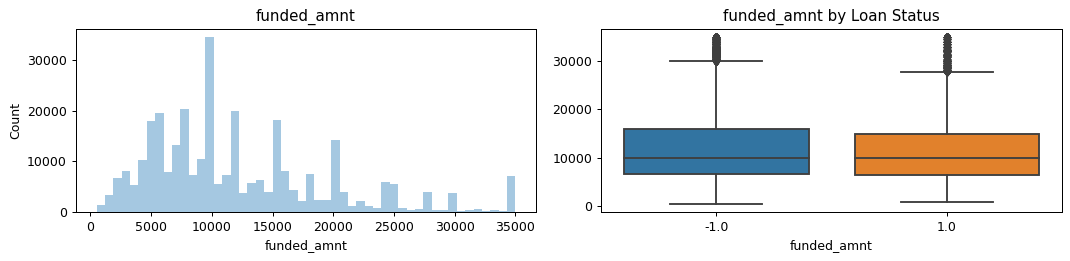

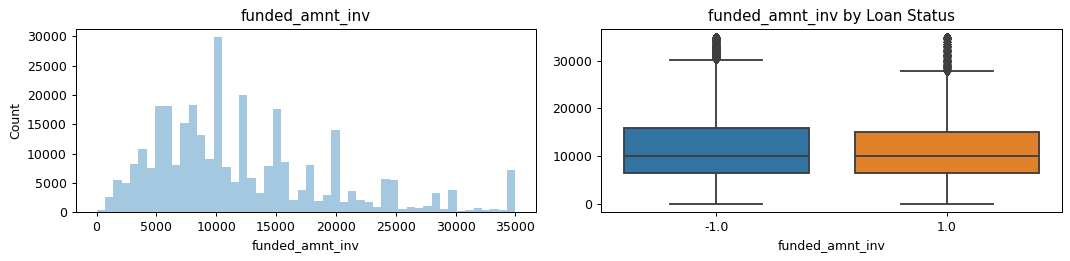

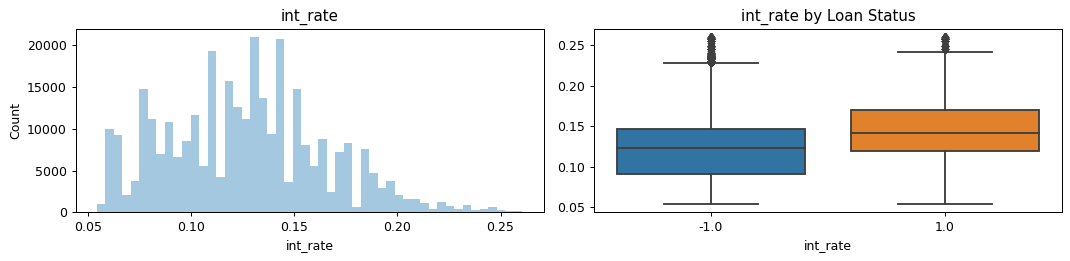

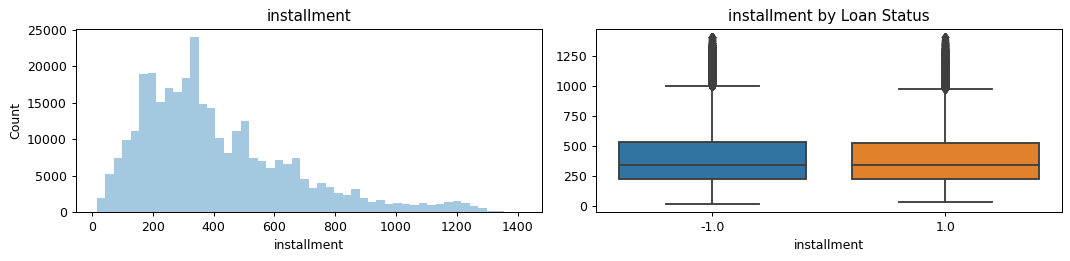

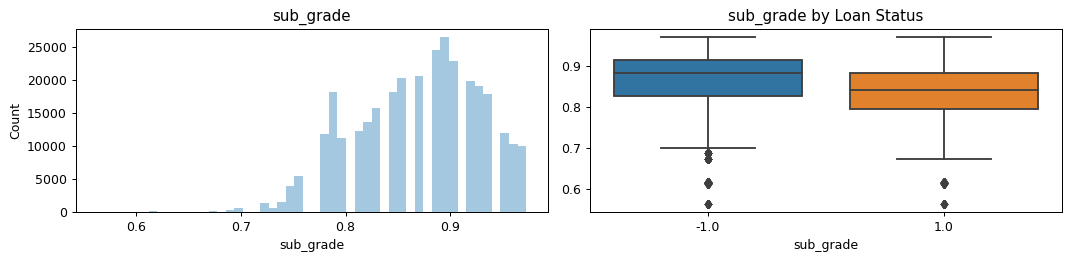

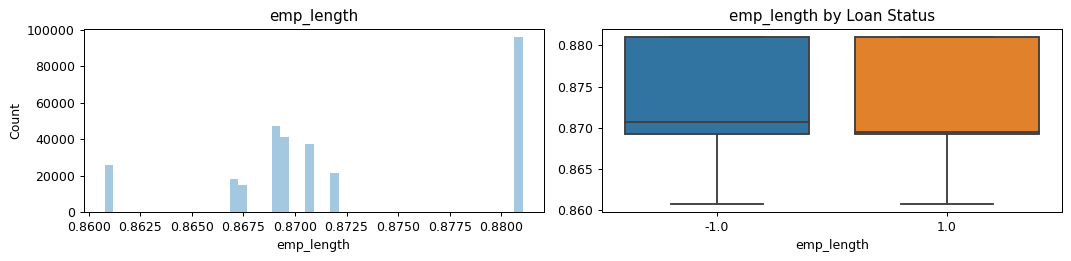

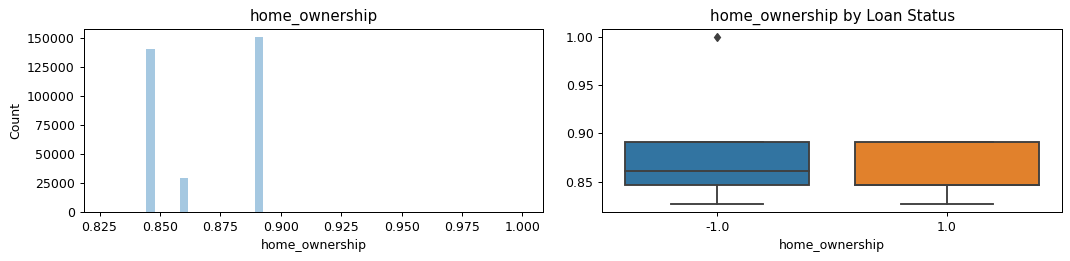

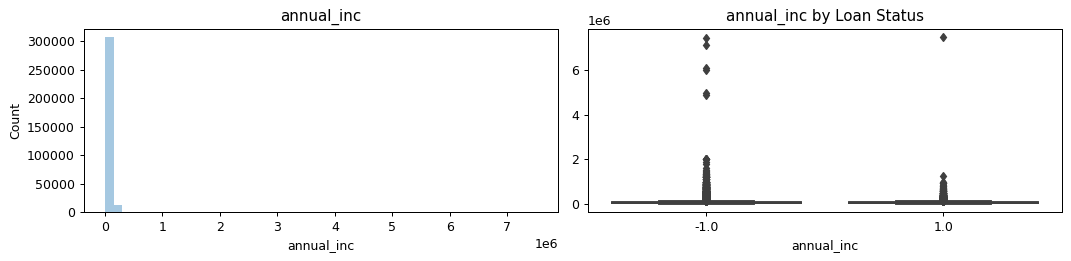

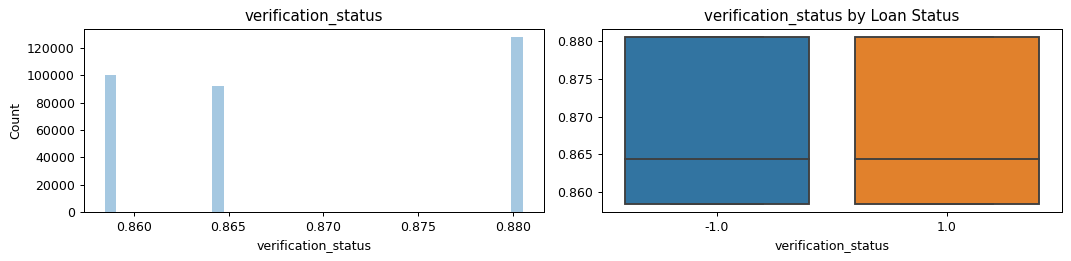

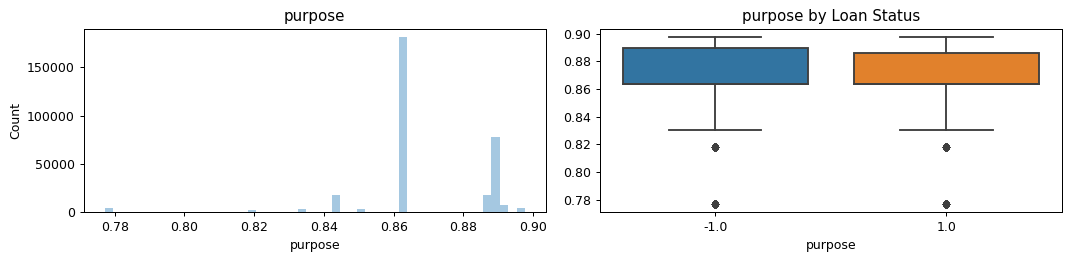

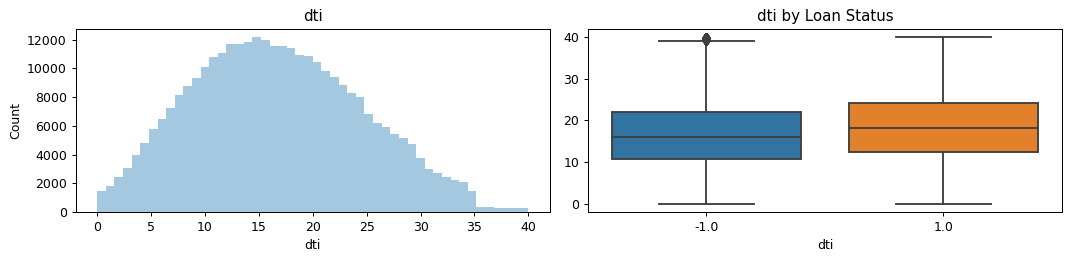

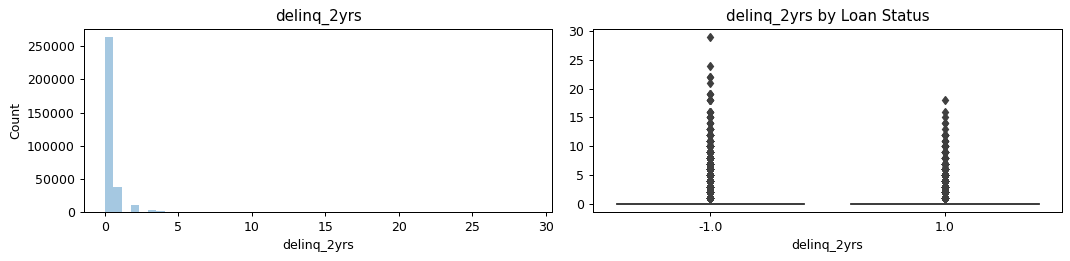

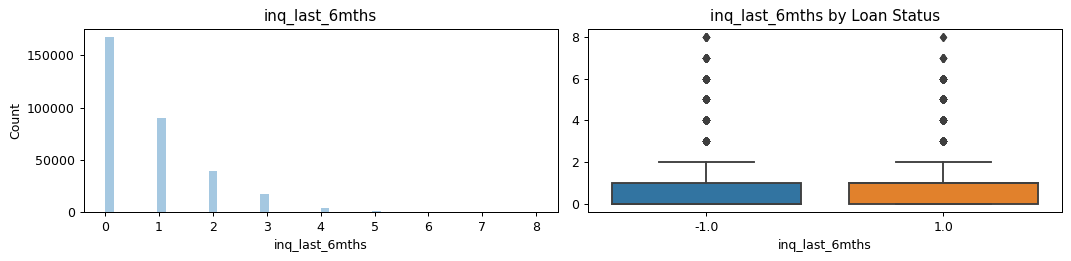

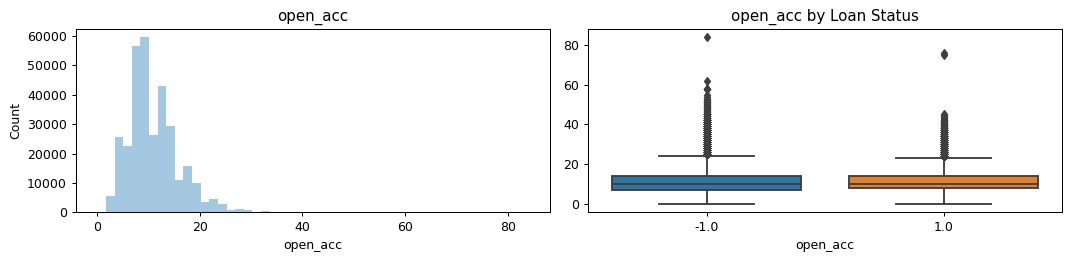

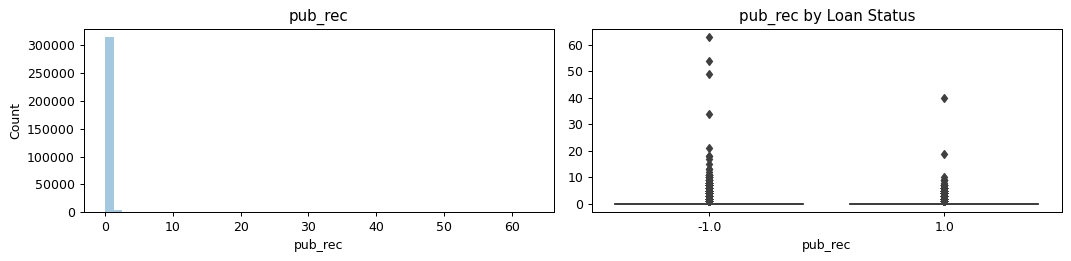

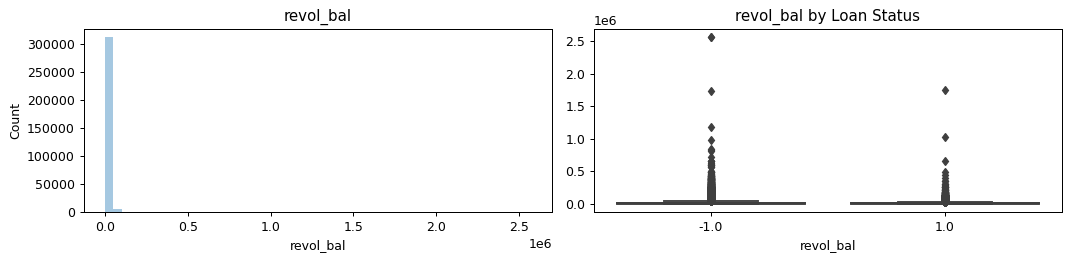

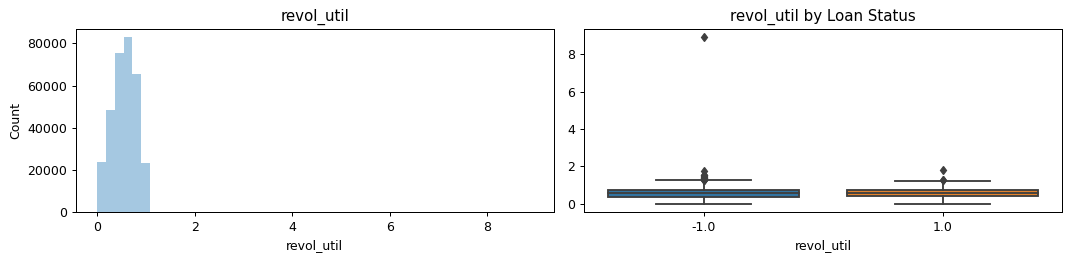

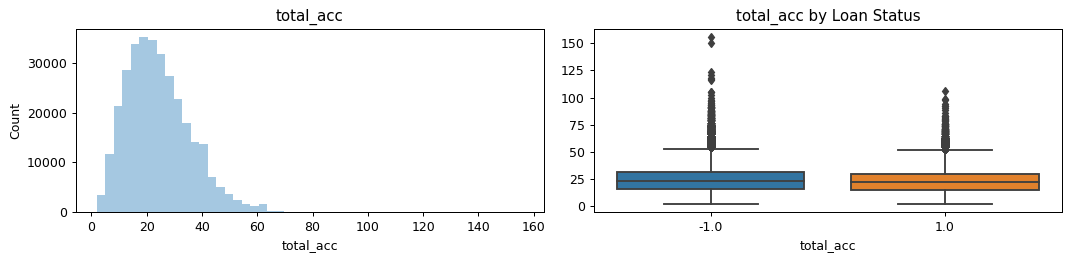

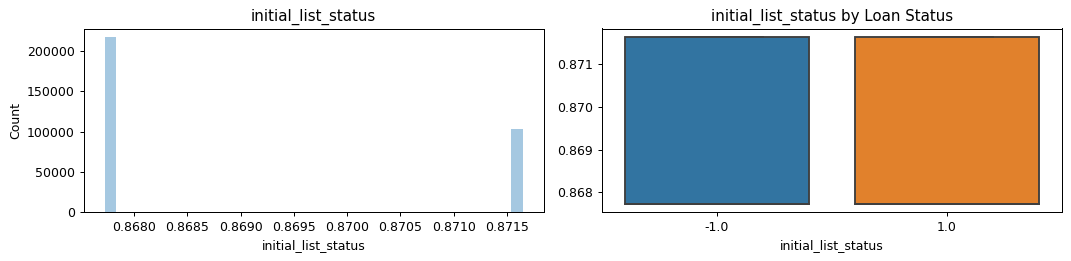

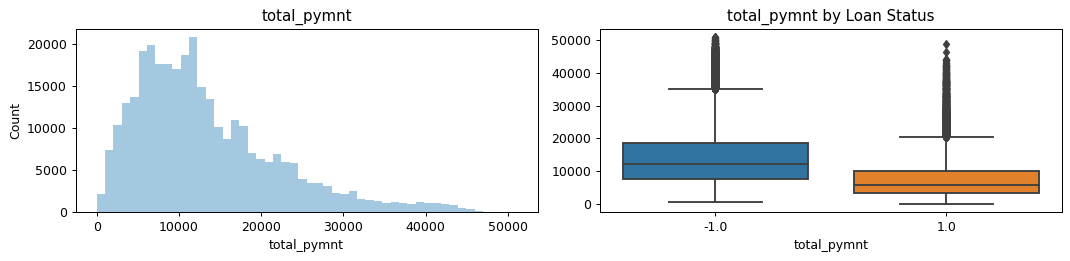

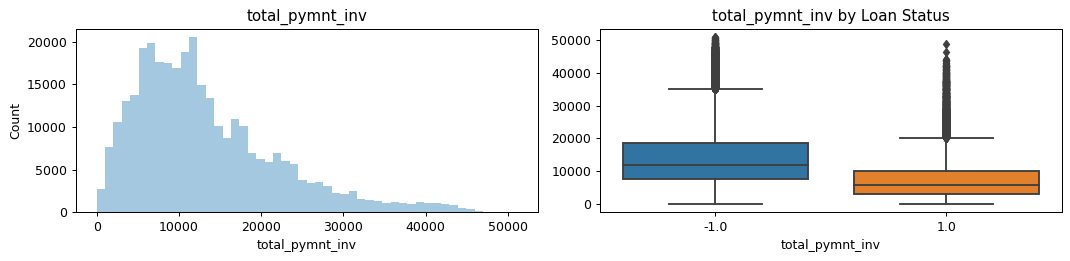

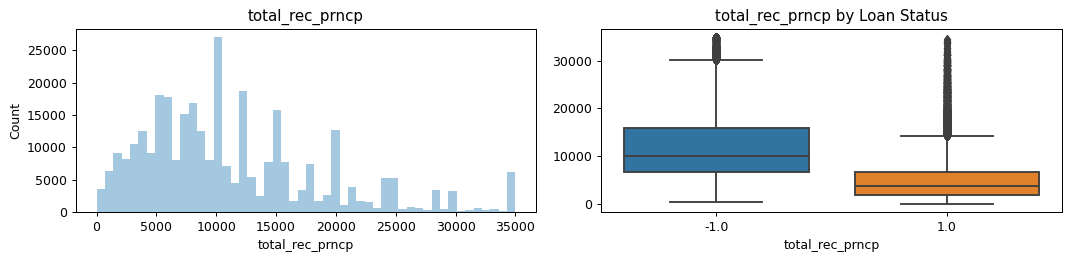

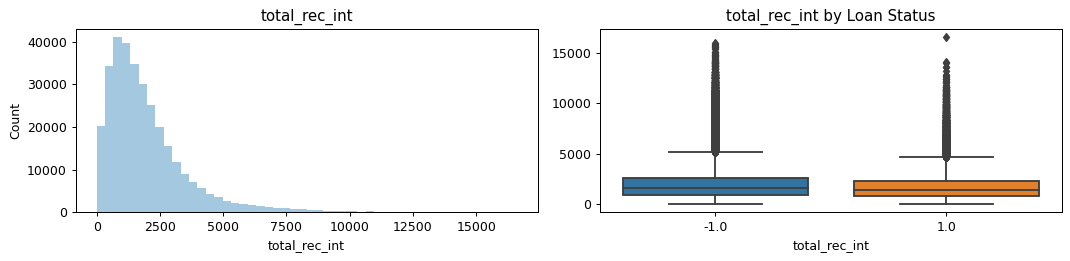

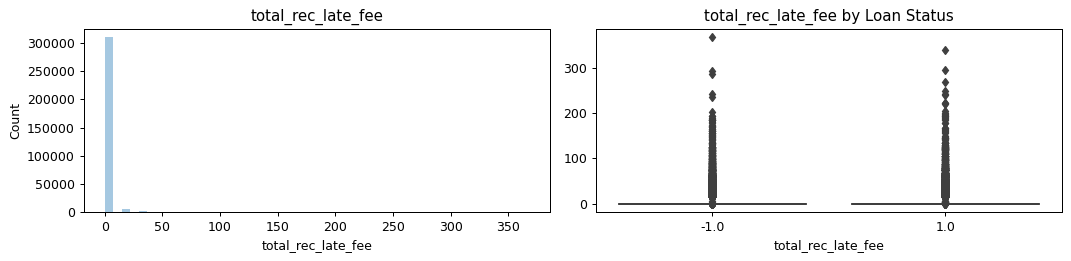

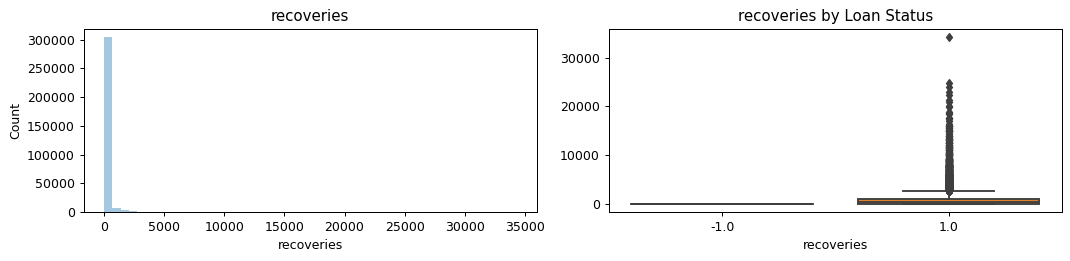

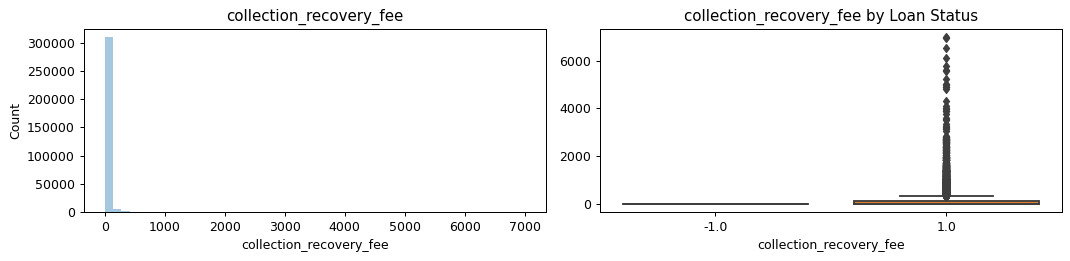

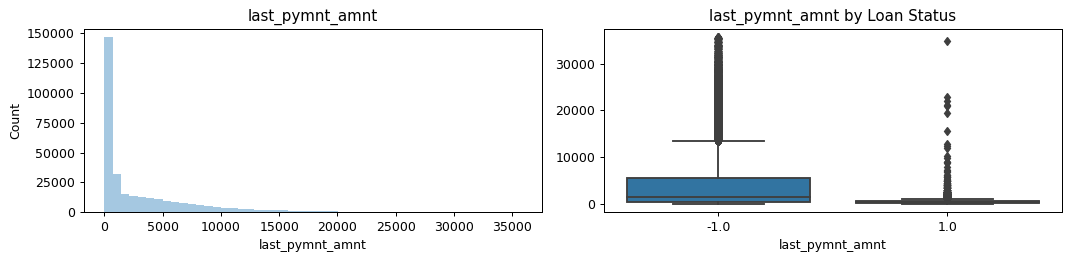

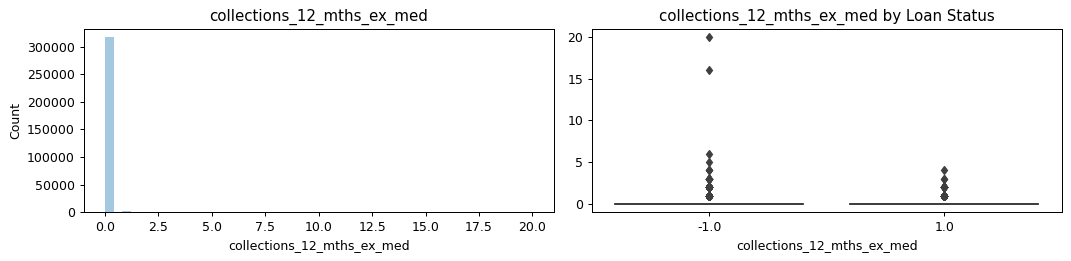

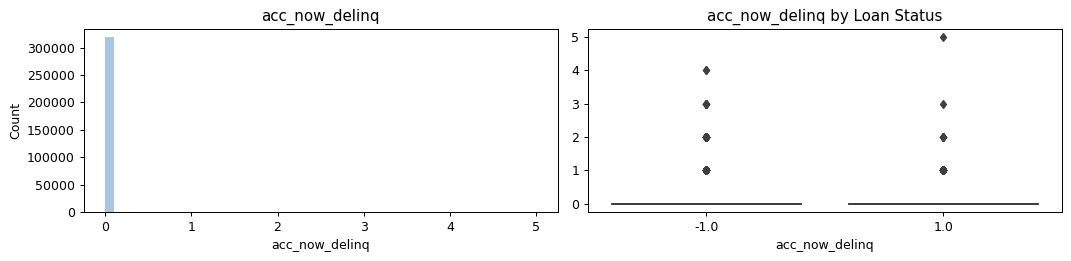

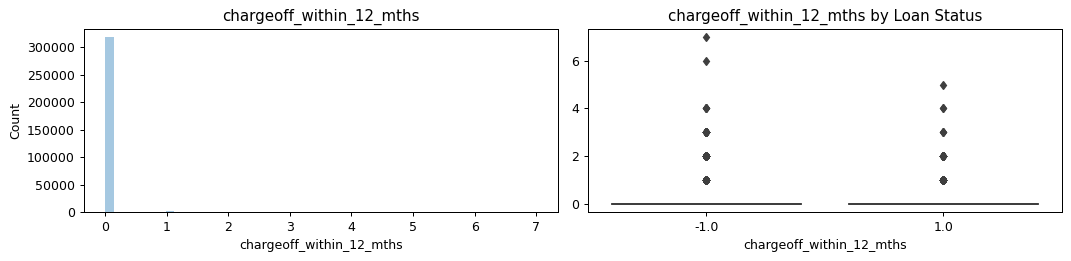

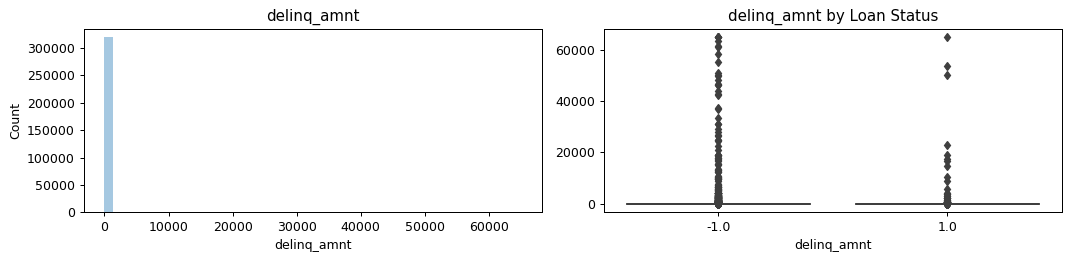

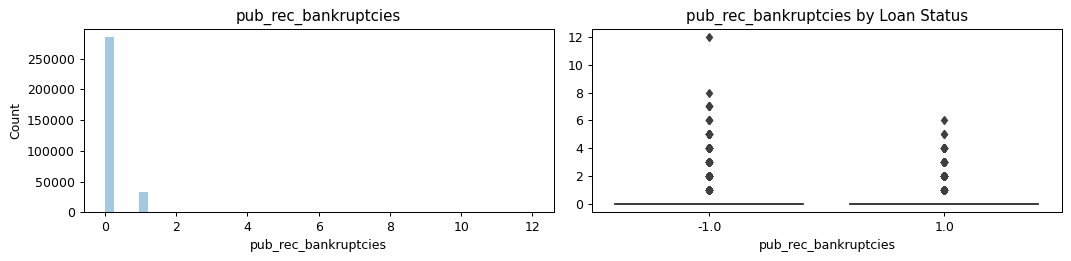

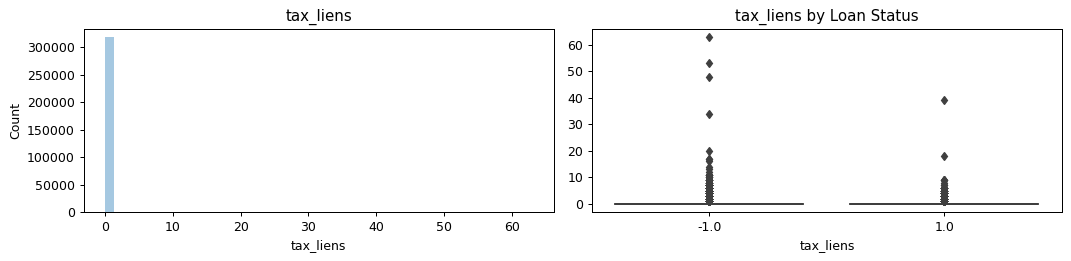

In [17]:
dist_box_plot(df3)

시각화 결과 해석:

각 컬럼에 대해 좌측 그래프는 각 값에 대한 count의 수 이고, 우측 그래프는 컬럼별로 loan_status가 0, 1일떄의 boxplot을 나타낸다.

좌측 그래프를 해석하면 installment 등 일부 컬럼이 비대칭성을 띄고 있어 log를 이용해 skewness를 없애주면 좋을 것이라는 것을 알 수 있다.

우측 그래프를 해석하면 이상치에 해당하는 큰 값들이 많이 존재하기 때문에 이상치를 어떻게 처리할지 고민해야 할 할 필요가 있어 보인다.
다만 몇몇 칼럼은 데이터가 0에 편향되어 있기 때문에 단순히 그래프만으로 이상치를 파악하기 힘들다.
또한 int_rate, sub_grade 등과 같이 boxplot 값이 명확하게 차이나는 컬럼들이 모델에 유의미할 것으로 예상된다.


##4. 이상치 처리

In [18]:
def out_percentile(df, col):
     lb, ub = np.nanpercentile(df[col],[0.5,99.5])
     out = np.where((df[col] < lb) | (df[col] > ub))[0]
     return out 

In [19]:
# 0.5% outlier
print('데이터 원본\n (charged-off / loan_status): ',df3['loan_status'].value_counts()[1]/df3.shape[0],'\n\n')
for i in df3.columns:
        if (i=='loan_status'):
            continue
        out = out_percentile(df3,i)
        a = []
        a.extend(out)
        dfIQ = df3['loan_status'].iloc[a]
        if(len(dfIQ)==0):
            print(i,'\n (charged-off / loan_status):  outlier 값이 범위 안에 존재하지 않음.\n')
        else:
            print(i,'\n (charged-off / loan_status): ',dfIQ.value_counts()[1]/len(dfIQ),'\n')

데이터 원본
 (charged-off / loan_status):  0.1310124484959891 


loan_amnt 
 (charged-off / loan_status):  0.1111111111111111 

funded_amnt 
 (charged-off / loan_status):  0.11159420289855072 

funded_amnt_inv 
 (charged-off / loan_status):  0.18661971830985916 

int_rate 
 (charged-off / loan_status):  0.1765389082462253 

installment 
 (charged-off / loan_status):  0.16306052053935402 

sub_grade 
 (charged-off / loan_status):  0.0647288503253796 

emp_length 
 (charged-off / loan_status):  outlier 값이 범위 안에 존재하지 않음.

home_ownership 
 (charged-off / loan_status):  0.1695906432748538 

annual_inc 
 (charged-off / loan_status):  0.15557065217391305 

verification_status 
 (charged-off / loan_status):  outlier 값이 범위 안에 존재하지 않음.

purpose 
 (charged-off / loan_status):  0.10235621991385863 

dti 
 (charged-off / loan_status):  0.16813324952859837 

delinq_2yrs 
 (charged-off / loan_status):  0.14864864864864866 

inq_last_6mths 
 (charged-off / loan_status):  0.2087912087912088 

open_acc 
 (ch

이상치를 어느 수준에서 처리할 것인가를 고민하기 위해 upper, lower 0.5%를 잘라 잘린 부분의 loan_status를 출력하였다.

값을 확인하여 보니 원본 (charged off/loan_status)의 비율인 '0.131'보다 더 낮거나 더 큰 방향으로 column들의 비율이 차이난다는 것을 확인할 수 있었다.

추가적으로 int_rate와 같은 경우 이자율이 높은 경우에 못갚을 확률이 높아진다는 직관적으로 납득할만한 결과가 나왔고 이러한 값들을 이상치로 정의하기는 어렵다고 판단하였다.

결과적으로 upper,lower bound를 이상치로 처리할때의 정보 손실이 더 크다고 판단하여 원 데이터 그대로 분석하기로 결정하였다.

##5. Null Value 처리

In [20]:
# null value가 있는 instance는 minor한 class의 비율이 높아 함부로 drop하기 어려움

In [21]:
# 모든 값을 float로 바꾸어 주었으므로, numerical한 imputation method 사용 가능
# KNN 을 통해 결측치 대체

from sklearn.impute import KNNImputer

def KNNimpute(data_, nn):
    imputer = KNNImputer(n_neighbors = nn)
    data_1 = imputer.fit_transform(data_)
    data_1 = pd.DataFrame(data_1, columns = data_.columns)
    
    return data_1

In [22]:
# emp_length의 경우 결측값이 1.6만개로 많은 편이다. 이를 모두 KNN학습을 통해 결측치를 대체함에 있어
# 시간이 너무나도 오래 걸리며 제외한 후 KNN으로 결측치를 대체하고 그 데이터를 SVM을 통해 학습한 결과 모델에 유의미한 차이가 없어 emp length column을 제거하는 방향으로 하였다.
df4 = df3.copy()
df4 = df4.drop(['emp_length'],axis='columns')
df4 = KNNimpute(df4, 5)

In [23]:
print(df4.shape)
df4.isnull().sum()

(319878, 34)


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_a

##6. 파생변수 생성 및 차원 축소

In [24]:
def feature_eng(data_):
  # 대출 신청하였지만 대출되지 않은 금액
  data_['not_loan_amnt'] = data_['loan_amnt']-data_['funded_amnt']
  # 대출 신청 중 대출된 금액 비율
  data_['loan_ratio'] = data_['loan_amnt'] /data_['funded_amnt']
  # 개인이 아닌 클럽에서 빌려준 금액
  data_['club_loan_amnt'] = data_['funded_amnt'] - data_['funded_amnt_inv']
  # 개인이 아닌 클럽에서 빌려준 금액 비율
  data_['club_loan_ratio'] = data_['club_loan_amnt']/data_['loan_amnt']
  return data_  

In [25]:
df5 = df4.copy()
df5 = feature_eng(df5)

In [26]:
df5[['not_loan_amnt','loan_ratio','club_loan_amnt','club_loan_ratio']].head(20)

,not_loan_amnt,loan_ratio,club_loan_amnt,club_loan_ratio
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0


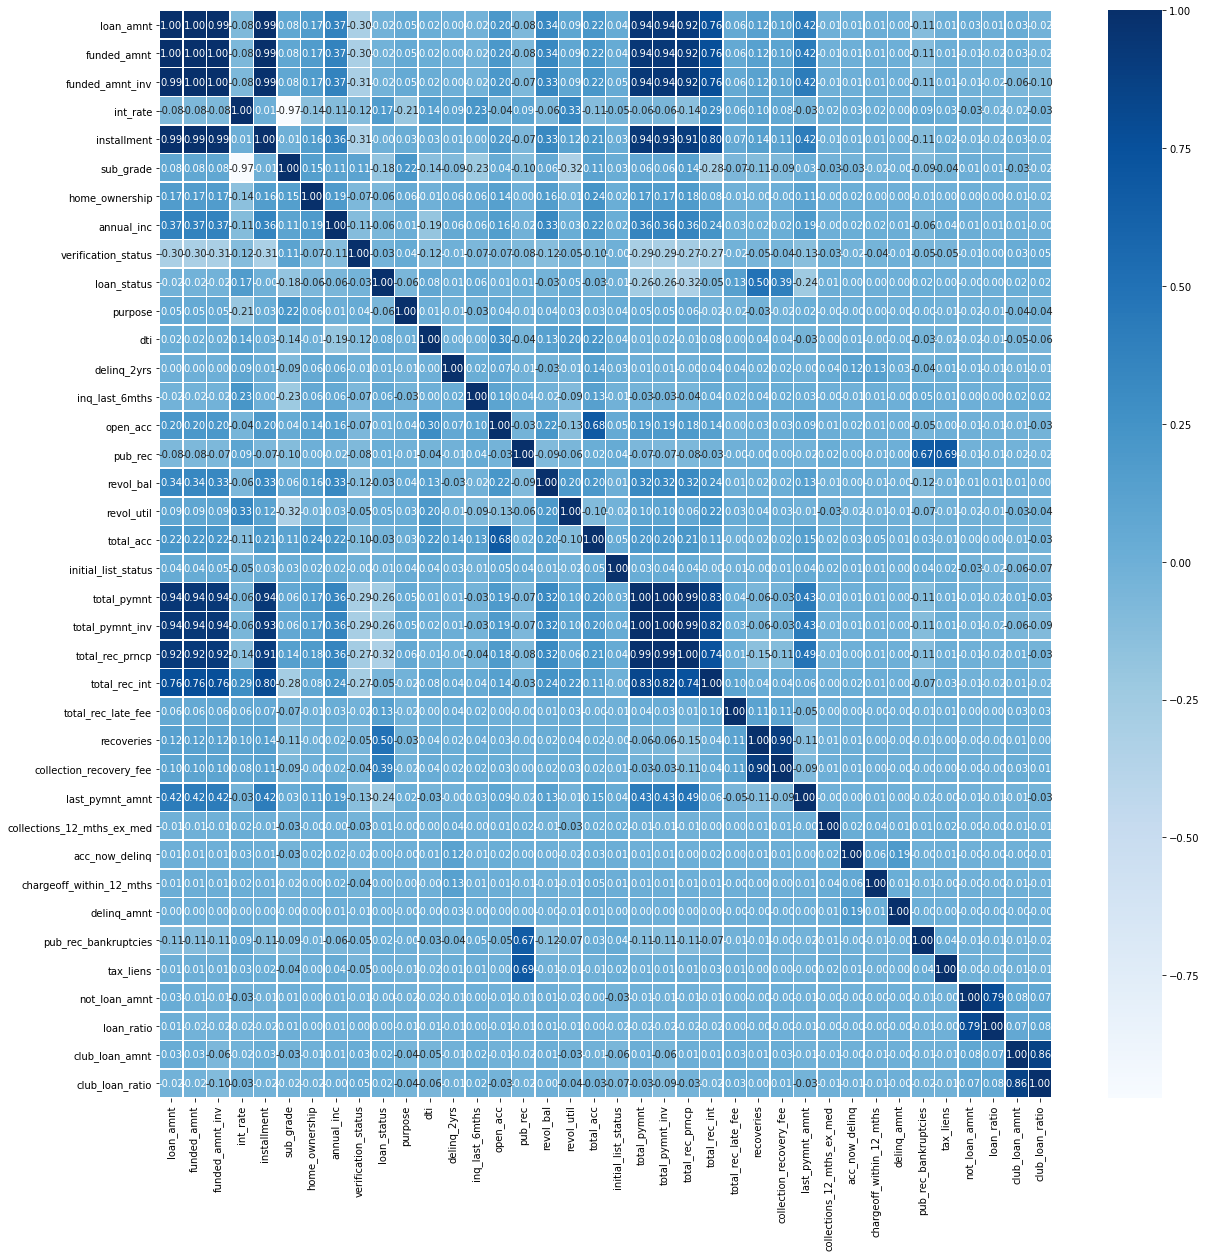

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data = df5.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [28]:
# corr 에 의한 변수 통합
def dimension_reduct(df):
    # correlation이 매우 높은loan_amnt, funded_amnt, funded_amnt_inv, installment를 amnt 로 통합 및 기존 컬럼 drop
    # correlation이 매우 total_pymnt, total_pymnt_inv, total_rec_prncp를 pymnt 로 통합 및 기존 컬럼 drop
    df['amnt']=df['loan_amnt']+df['funded_amnt']+df['funded_amnt_inv']+df['installment']
    df['pymnt']=df['total_pymnt']+df['total_pymnt_inv']+df['total_rec_prncp']
    df.drop(['loan_amnt','funded_amnt','funded_amnt_inv','installment'], axis=1, inplace=True)
    df.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp'], axis=1, inplace=True)
    return df


df6 = df5.copy()
df6 = dimension_reduct(df6)

In [29]:
# loan_status와 각 column의 상관계수
df6.corr()['loan_status'].sort_values()

pymnt                        -0.276677
last_pymnt_amnt              -0.239281
sub_grade                    -0.178769
home_ownership               -0.063293
annual_inc                   -0.060173
purpose                      -0.055848
total_rec_int                -0.048997
revol_bal                    -0.029080
verification_status          -0.028699
total_acc                    -0.026845
amnt                         -0.019565
initial_list_status          -0.005439
not_loan_amnt                -0.001728
delinq_amnt                   0.000004
chargeoff_within_12_mths      0.000381
loan_ratio                    0.001383
tax_liens                     0.002277
acc_now_delinq                0.002530
open_acc                      0.005588
collections_12_mths_ex_med    0.007229
delinq_2yrs                   0.013159
pub_rec                       0.014976
club_loan_ratio               0.015225
pub_rec_bankruptcies          0.015542
club_loan_amnt                0.020286
revol_util               

##7. 스케일링

In [30]:
# 로그 스케일링에 앞서 각 column의 skewness, kurtosis 확인
for col in df6.columns: 
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df6[col].skew()) ,
          ' ' , 'Kurtosis: {:06.2f}'.format(df6[col].kurt()) )
    

int_rate        Skewness: 00.36   Kurtosis: -00.19
sub_grade       Skewness: -0.38   Kurtosis: -00.42
home_ownership  Skewness: 00.03   Kurtosis: -01.92
annual_inc      Skewness: 34.76   Kurtosis: 3682.62
verification_status Skewness: 00.24   Kurtosis: -01.75
loan_status     Skewness: 02.19   Kurtosis: 002.78
purpose         Skewness: -1.66   Kurtosis: 006.61
dti             Skewness: 00.22   Kurtosis: -00.54
delinq_2yrs     Skewness: 05.55   Kurtosis: 057.98
inq_last_6mths  Skewness: 01.54   Kurtosis: 002.68
open_acc        Skewness: 01.17   Kurtosis: 002.89
pub_rec         Skewness: 17.62   Kurtosis: 1370.61
revol_bal       Skewness: 25.29   Kurtosis: 2232.81
revol_util      Skewness: -0.08   Kurtosis: 004.03
total_acc       Skewness: 00.84   Kurtosis: 001.01
initial_list_status Skewness: 00.76   Kurtosis: -01.42
total_rec_int   Skewness: 02.04   Kurtosis: 006.12
total_rec_late_fee Skewness: 13.67   Kurtosis: 308.40
recoveries      Skewness: 12.17   Kurtosis: 282.36
collection_recove

In [31]:
# Skewness와 Kurtosis 가 높은 feature
log_col = ['annual_inc','pub_rec','revol_bal','total_rec_int', 'total_rec_late_fee','collection_recovery_fee', 'pymnt','last_pymnt_amnt','total_rec_int',
           'collections_12_mths_ex_med','delinq_amnt','tax_liens','not_loan_amnt','loan_ratio']

# 위의 featue들을 로그 변환 
def log_feature(data_, col_list):
  for col in col_list:
    data_[col] = np.log(data_[col]+1)

  return data_

In [32]:
df7 = df6.copy()
df7 = log_feature(df7,log_col)

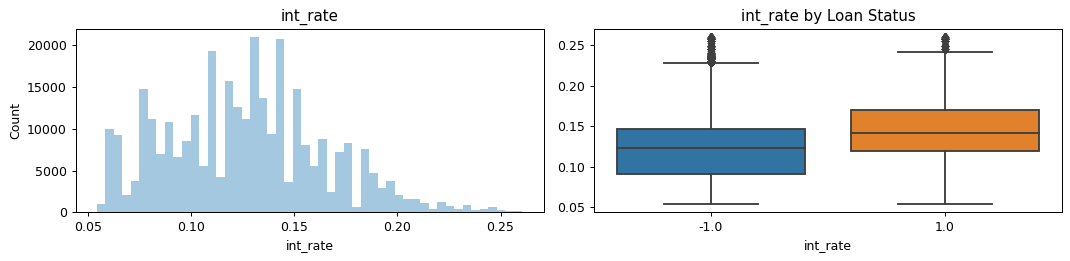

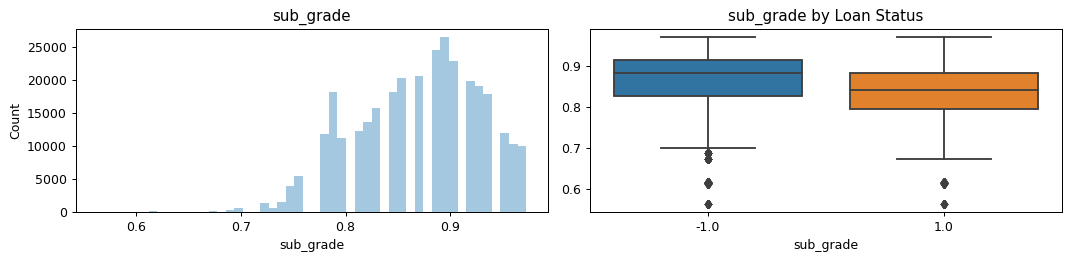

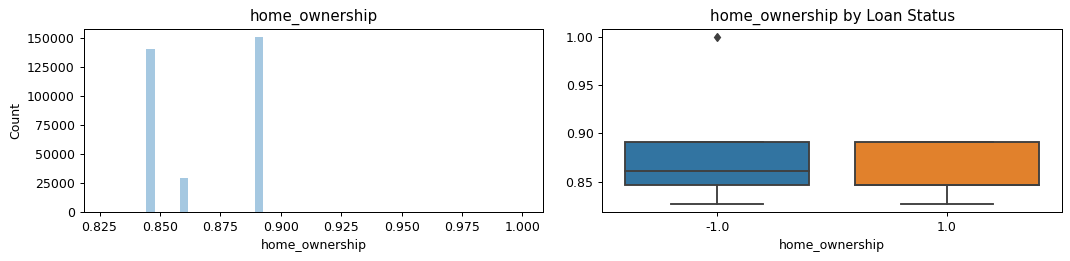

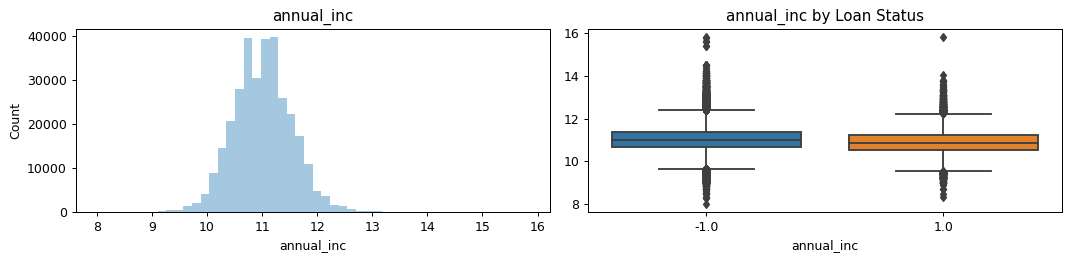

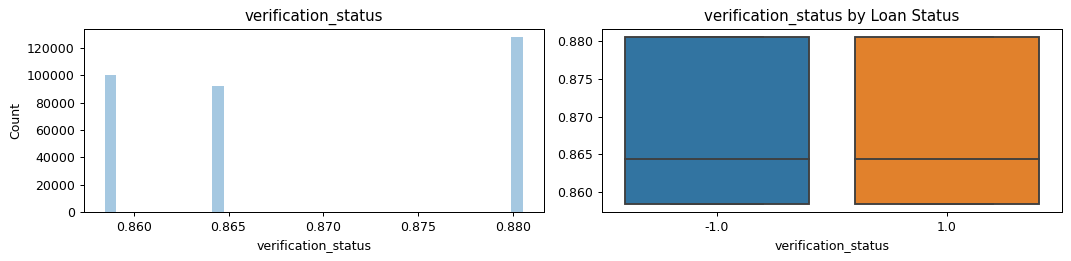

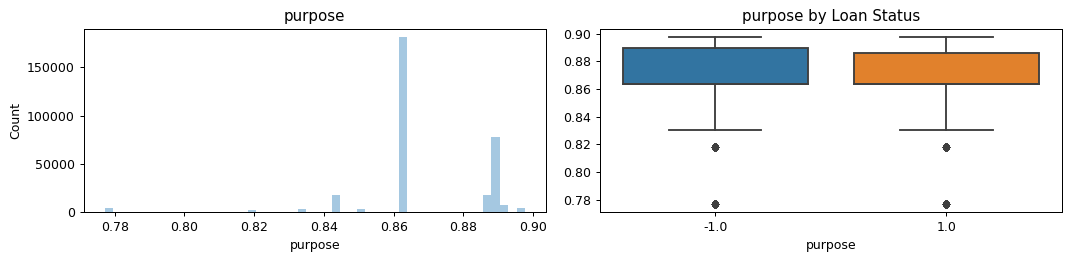

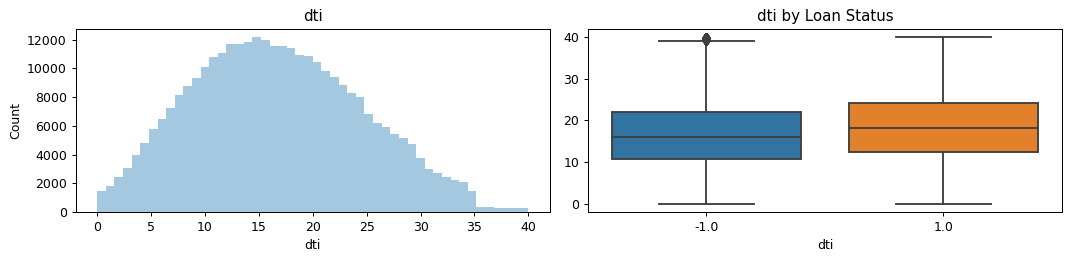

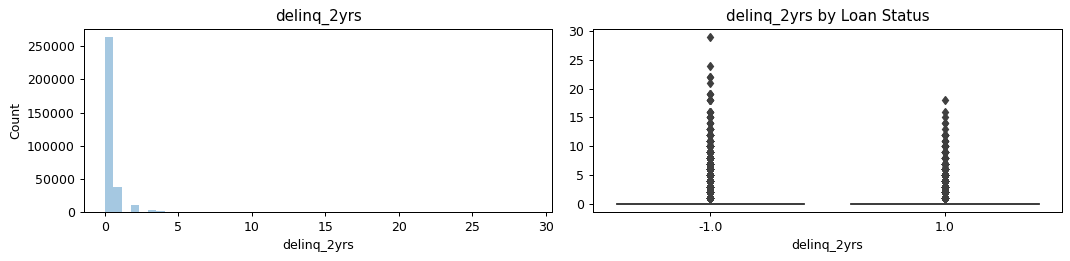

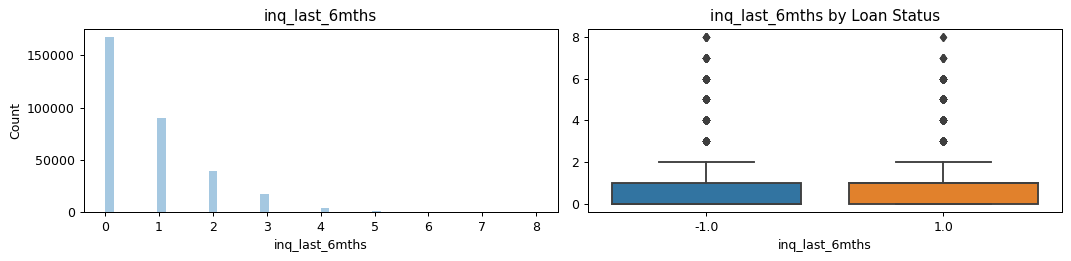

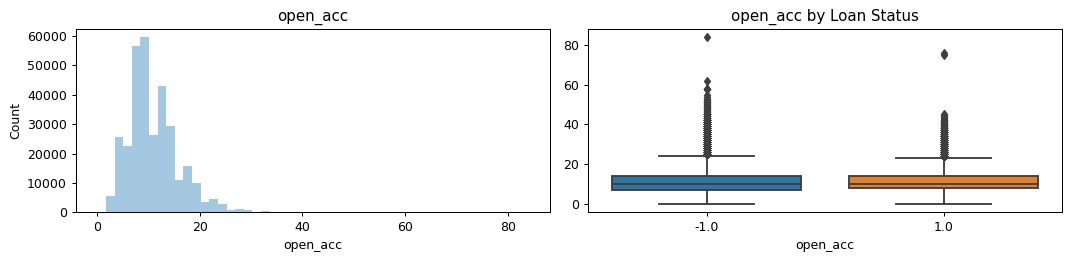

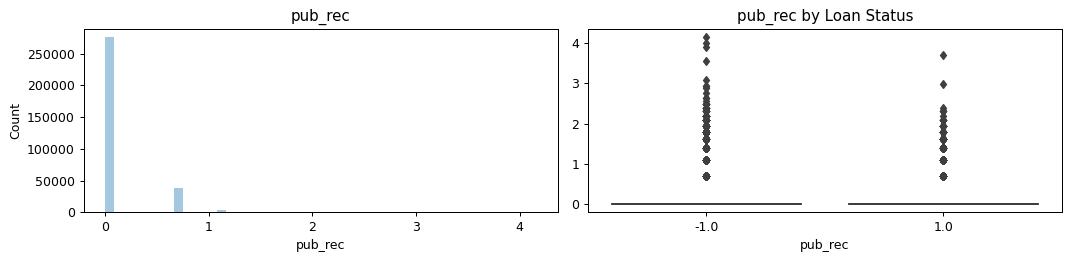

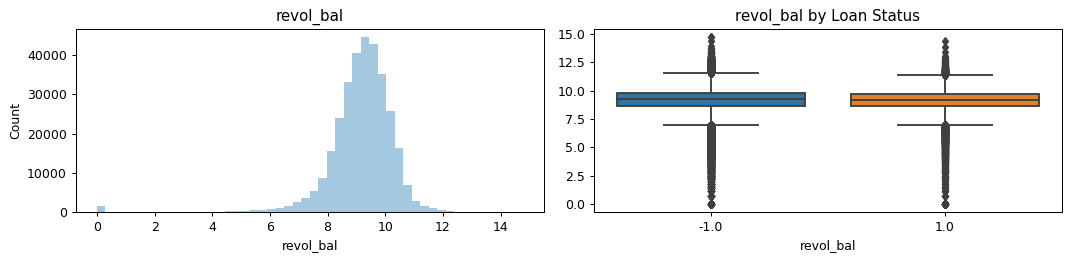

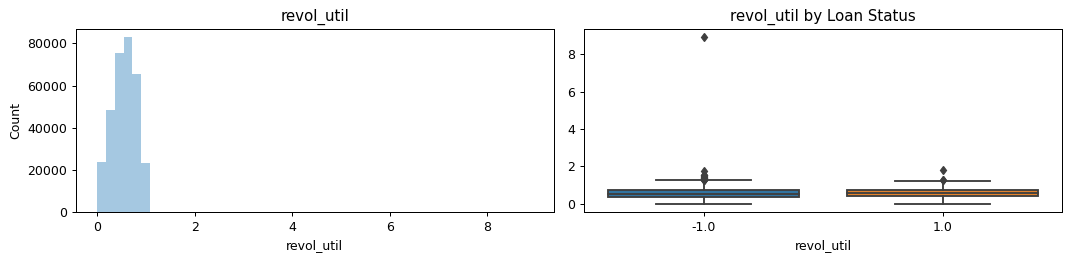

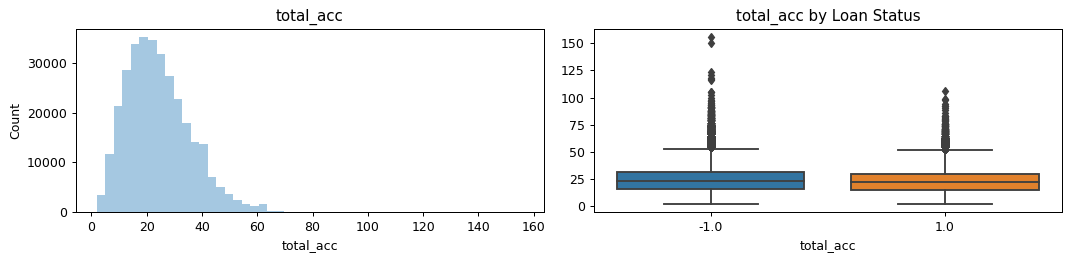

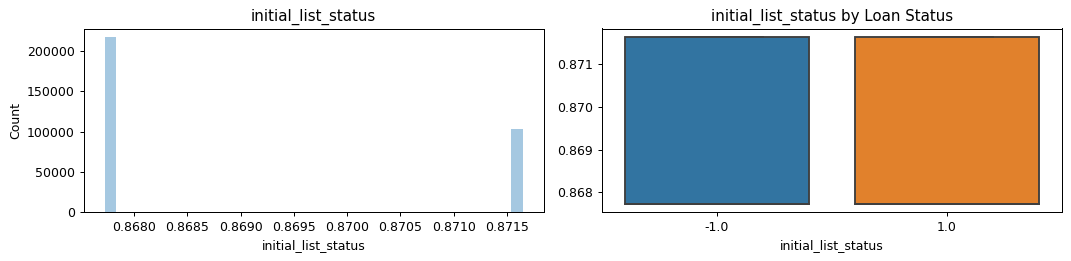

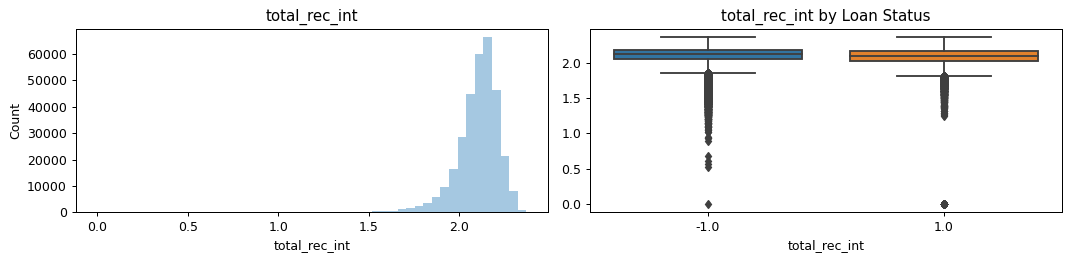

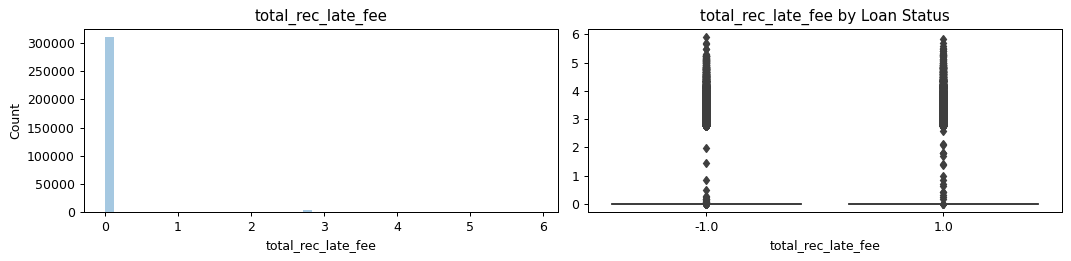

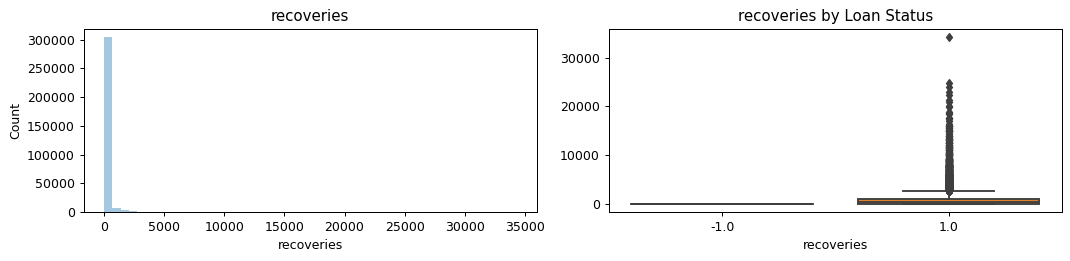

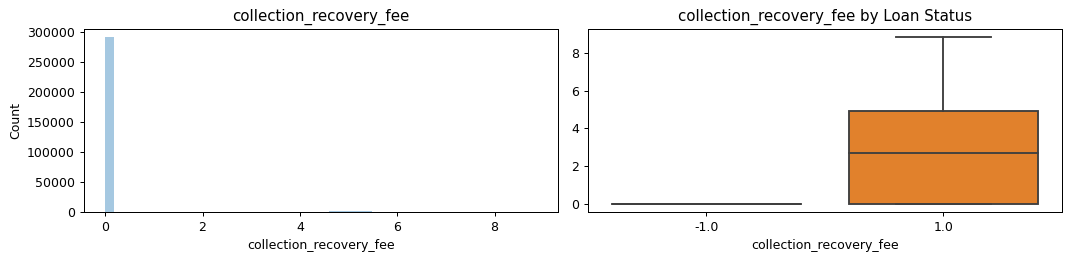

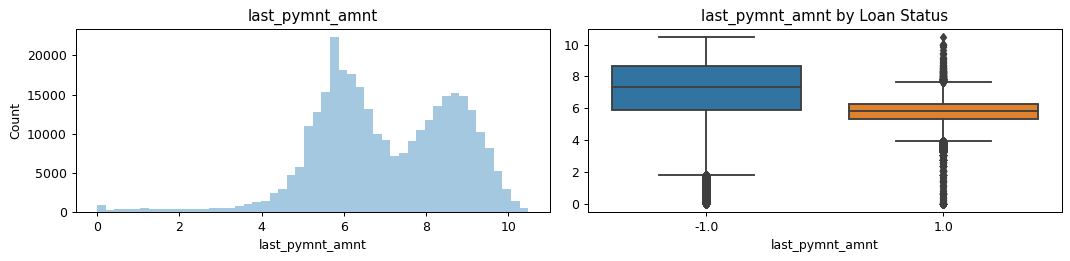

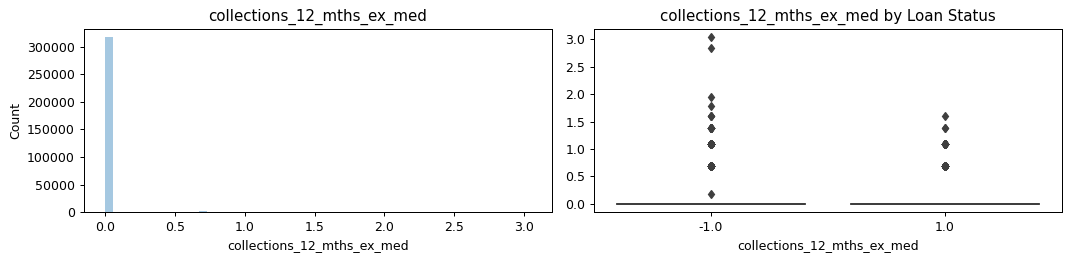

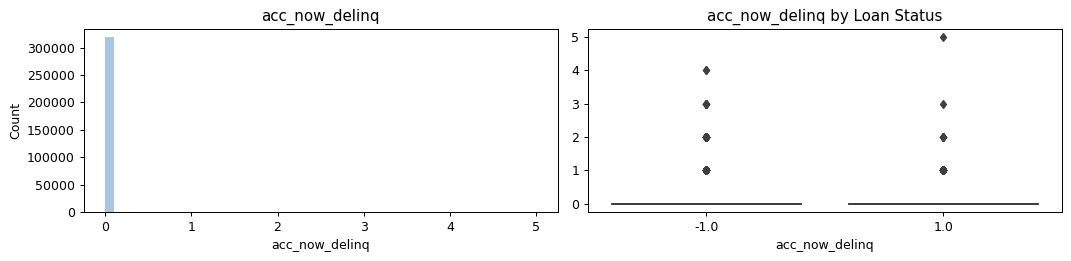

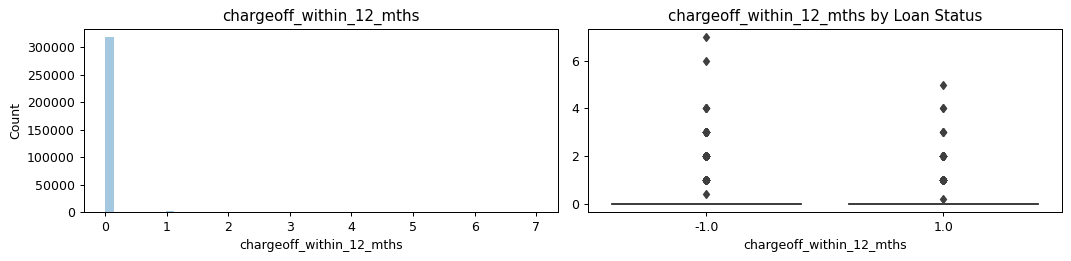

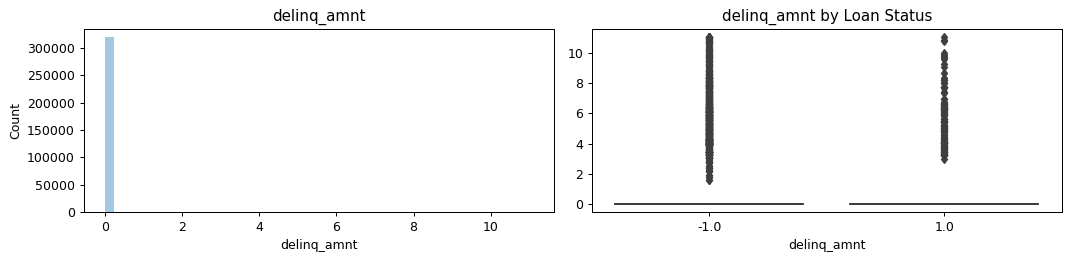

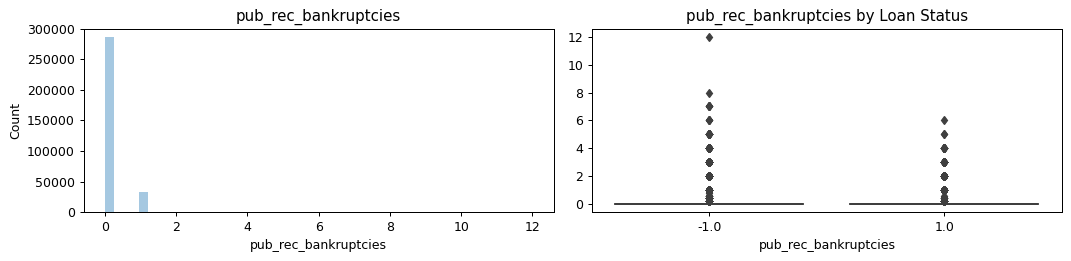

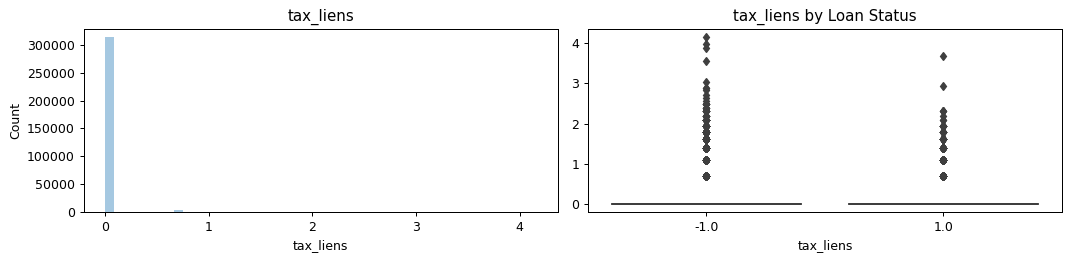

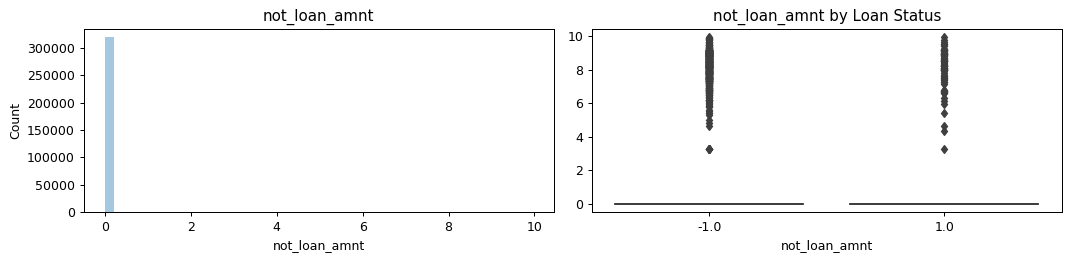

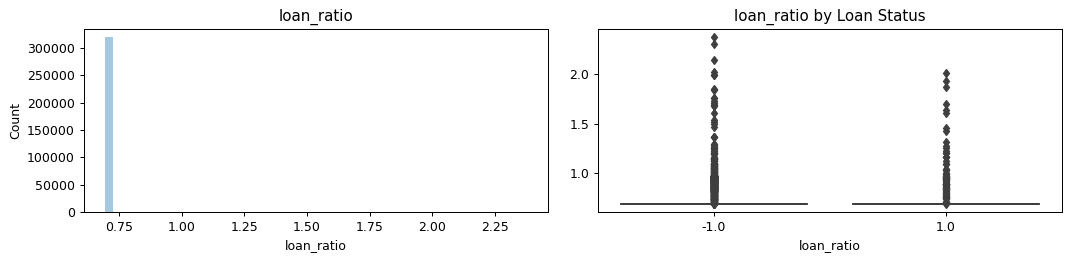

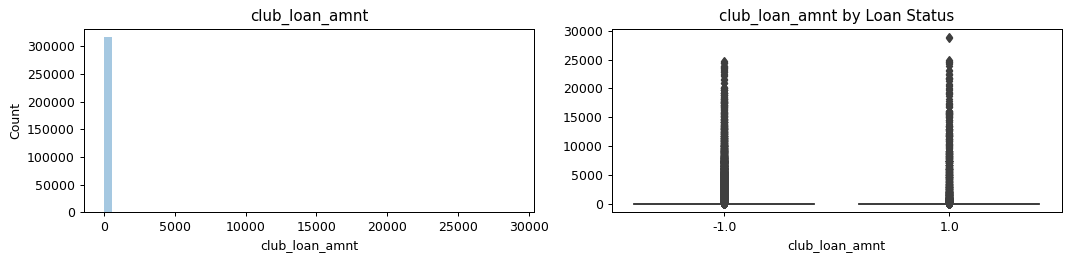

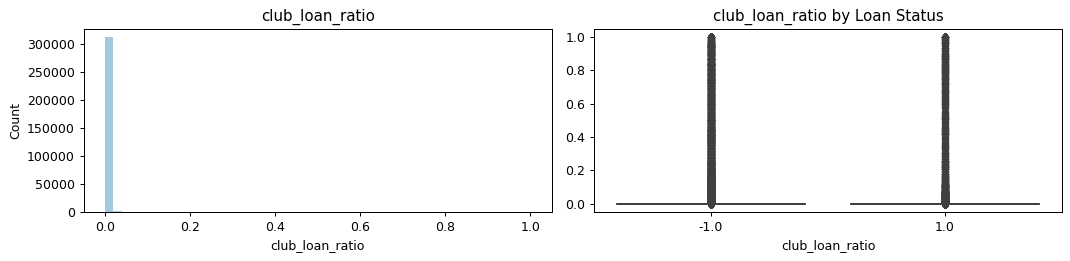

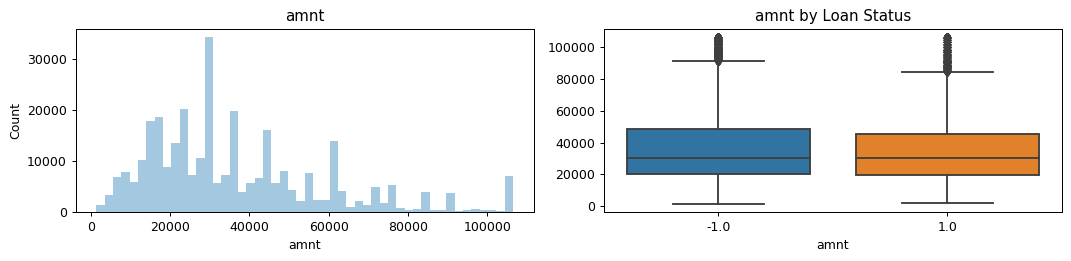

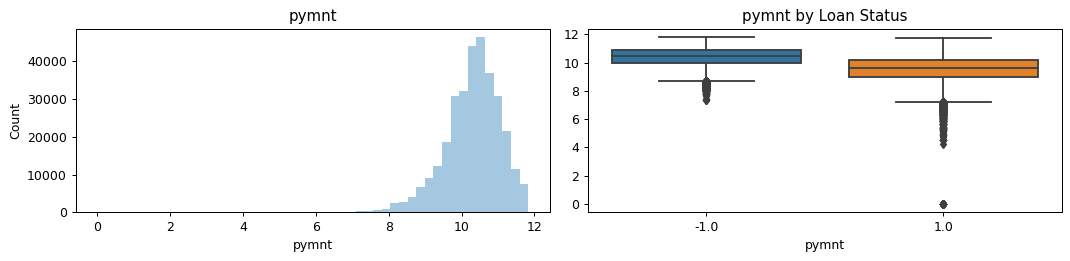

In [33]:
dist_box_plot(df7)

In [34]:
def split_xy(data_):
  X = data_.loc[:,data_.columns!='loan_status']
  y = data_['loan_status']
  return X, y

In [35]:
X, y = split_xy(df7)

In [36]:
from sklearn.preprocessing import StandardScaler

# data standardization
def standardscaler(X):
  X_col = X.columns
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  data_ = pd.DataFrame(X, columns=X_col)

  cache = []
  cache.append(X.mean(axis=0))
  cache.append(X.std(axis=0))

  return data_, cache

def standardscaler_test(X,cache):
    return (X - cache[0]) / cache[1]

In [37]:
X,cache = standardscaler(X)
X['loan_status']=y.tolist()
df___ = X.copy()

In [38]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319878 entries, 0 to 319877
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    319878 non-null  float64
 1   sub_grade                   319878 non-null  float64
 2   home_ownership              319878 non-null  float64
 3   annual_inc                  319878 non-null  float64
 4   verification_status         319878 non-null  float64
 5   loan_status                 319878 non-null  float64
 6   purpose                     319878 non-null  float64
 7   dti                         319878 non-null  float64
 8   delinq_2yrs                 319878 non-null  float64
 9   inq_last_6mths              319878 non-null  float64
 10  open_acc                    319878 non-null  float64
 11  pub_rec                     319878 non-null  float64
 12  revol_bal                   319878 non-null  float64
 13  revol_util    

# 2.2. 모델링

    1. 모델링 함수 정의
    2. 모델 성능 비교 후 모델 선택    

In [39]:
df7.head()

,int_rate,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,not_loan_amnt,loan_ratio,club_loan_amnt,club_loan_ratio,amnt,pymnt
0,0.1757,0.785973,0.846770,11.440366,0.864419,1.0,0.863619,12.66,1.0,1.0,9.0,0.000000,8.399760,0.397,20.0,0.867721,2.170715,0.000000,88.27,2.826639,5.664695,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,24287.50,10.179942
1,0.1335,0.843267,0.891276,12.429220,0.864419,1.0,0.844296,0.63,0.0,2.0,10.0,2.079442,8.323123,0.142,24.0,0.871648,2.262956,4.007515,1640.79,5.691515,7.703220,0.0,0.0,0.0,0.0,0.0,2.079442,0.0,0.693147,0.0,0.0,96780.23,10.993235
2,0.1757,0.778884,0.891276,11.002117,0.858461,1.0,0.844296,23.40,0.0,0.0,31.0,0.000000,9.359364,0.835,66.0,0.867721,1.930442,0.000000,0.00,0.000000,4.005695,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,4553.91,8.067444
3,0.1777,0.795160,0.891276,10.819798,0.864419,1.0,0.863619,3.50,0.0,2.0,7.0,0.693147,8.500657,0.410,12.0,0.871648,2.079254,0.000000,0.00,0.000000,5.889930,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.693147,0.0,0.0,30360.38,8.930114
4,0.1849,0.785973,0.846770,11.512935,0.864419,1.0,0.889693,18.67,0.0,0.0,15.0,0.000000,10.577146,0.956,29.0,0.867721,2.281174,3.799526,7.36,0.000000,7.138851,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,72873.57,10.835050


## 1. 모델링 함수 정의
    
    - 커널, 정규화, 평가지표 함수
    - data_balancing 함수
    - SVM 함수
        - Fuzzy Membership
        - (Linear, Gaussian, Fuzzy) option SVM
        - Stratified K-Fold SVM with data balancing
        

### 1-1. 커널, 정규화, 평가지표 함수

In [40]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#1. 커널, 정규화, 평가지표 함수
def Kernel_(x, y, params = 0, type_ = 'default') :
    if type_ == 'rbf' :
        Kernel = np.exp(- (np.sum(x **2, axis = 1).reshape(-1,1) + np.sum(y **2, axis = 1).reshape(1,-1) - 2 * x @ y.T)* params)
        return Kernel
    elif type_ == 'default' :
        Kernel = np.dot(x, y.T)
        return Kernel

def Minmax_(X) :
    return (X - X.min(axis = 0)) / (X.max(axis= 0) - X.min(axis = 0)), X.max(axis =0) , X.min(axis =0)

def Standar_(X) :
    return (X - X.mean(axis =0)) / X.std(axis = 0), X.mean(axis =0), X.std(axis = 0)

def Convolution(pred, real) :
    pred = np.array(pred)
    y = np.array(real)
    TP = np.sum((pred == 1) & (y == 1))
    FP = np.sum((pred == 1) & (y != 1))
    FN = np.sum((pred != 1) & (y == 1))
    TN = np.sum((pred != 1) & (y != 1))
    return TP, FP, FN, TN

def acc_precision_recall(X) : #accuracy, precision, recall 반환
    TP,FP,FN,TN = X
    return (TP + TN) / (TP + FP + FN + TN), TP / (TP + FP), TP / (TP + FN)



### 1-2. data_balancing 함수

In [41]:
from imblearn.under_sampling import RandomUnderSampler
#data_balancing 함수
def data_balancing(df,a,b):# a:b
    X = df[df.columns.difference(['loan_status'])]
    X_col = X.columns
    y = df['loan_status']
    size = len(np.where(df['loan_status']==1)[0])# label 1의 size
    rus = RandomUnderSampler(sampling_strategy={1: int(size), -1: int(size*b/a)},random_state=0)
    rus.fit(X, y)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    
    X_resampled = pd.DataFrame(X_resampled, columns = X_col)
    X_resampled['loan_status'] = y_resampled
    return X_resampled

### 1-3. SVM 함수
        - Fuzzy Membership
        - (Linear, Gaussian, Fuzzy) option SVM
        - Stratified K-Fold SVM with data balancing

In [42]:
from scipy.stats import entropy #  calculate the entropy
from scipy.spatial import distance # calculate the Euclidean distance (distance.cdist)

# Fuzzy Membership 계산
def cal_FM(C,k,m,beta,data_): 
    
    df = data_.copy()
    dist = distance.cdist(data_, data_, metric='euclidean')
    
    #엔트로피 계산부분
    Entropys = list()
    major_index = df['loan_status'] == -1 #덜 중요한 데이터

    for i in range(0,len(df)):
        num_plus = 0
        #a = dist[major]
        a = np.array(dist[i])
        neighbors_index = a.argsort()[1:k+1] #자기자신은 0이므로 가장 앞에 있을것. 즉 제외
        for j in neighbors_index:
            if df.iloc[j]['loan_status'] == 1: #중요도 높은 것, 즉 안 갚은 이웃의 수가 num_plus
                num_plus +=1
        p_p = num_plus/k
        p_n = 1.0 - p_p
        if(p_p == 0  or p_n == 0):
            entropy = 0.0
        else:
            entropy = (- p_p)*np.log(p_p) - p_n*np.log(p_n) #엔트로피 계산
        Entropys.append(entropy)
    df['Entropy'] = Entropys

    #Subset 생성부분
    up = df['Entropy'].argmax()
    low = df['Entropy'].argmin()
    Hmax = df.iloc[up]['Entropy']
    Hmin = df.iloc[low]['Entropy']

    FML = list()
    
    for i in range(0,len(df)): 
        if df.iloc[i]['loan_status'] == 1: #중요한 데이터인 경우 Fuzzy Membership 1부여
            FML.append(1)
        else:
            for L in range(1,m+1): 
                thrUp = Hmin + L*(Hmax - Hmin)/(m-1)
                thrLow = Hmin + (L-1.0)*(Hmax - Hmin)/(m-1)
                if df.iloc[i]['Entropy']>=thrLow and df.iloc[i]['Entropy'] < thrUp:
                    FML.append(1.0 - beta*(L)) #Subset에 해당하는 data들의 index값이 들어감

    df['FM'] = FML #dataframe에 추가하는 방식으로 반환
    
    return df

In [43]:
#(Linear, Gaussian, Fuzzy) option SVM
#FM이 1이면 fuzzy entropy SVM, 0이면 일반 SVM
def SVM(C,Gamma,X_train,Y_train,X_val,Y_val,LM,types_,FM): 

    # training data to np array
    y = np.array(Y_train)*1.
    #X = X_train.drop(['loan_status'],axis=1)
    
    X = np.array(X_train)
    y = y.reshape(-1,1) 
    m,n = X.shape
    
    # validation data to np array
    y_v = np.array(Y_val)*1.
    X_v = X_val.drop(['loan_status'],axis=1)
    
    X_v = np.array(X_v)
    y_v = y_v.reshape(-1,1) 
    
    #Kernel 관련 정의 numpy array 형식으로 생성
    if types_=='default':
        H = Kernel_(X, X) * 1.
    elif types_ == 'rbf':
        H = Kernel_(X,  X  , params = Gamma, type_ = 'rbf')* 1.
        
    H *= y@y.T
    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(np.vstack((-np.eye(m),np.eye(m))))
    if FM == 0:
        h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    elif FM == 1:
        h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m)* X_train['FM'] * C)))
        X = X[:,:-2] #X에 Entropy data와 Fuzzy Membership data가 있으므로 제거
    A = cvxopt_matrix(y.reshape(1, -1))
    b = cvxopt_matrix(np.zeros(1))
    
    #Run solver
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    
    #kernel에 따라 도출되는 값이 다름
    if types_=='default': 
        w = ((y * alphas).T @ X).reshape(-1,1)
        S = ((alphas > LM) & (alphas < C-LM)).flatten() #LM으로 범위설정
        b = y[S] - np.sum(Kernel_(X, X[S], type_ = 'default')* y * alphas , axis = 0).reshape(-1,1)
    elif types_=='rbf':
        S = ((alphas > LM) & (alphas < C-LM)).flatten()
        b = y[S] - np.sum(Kernel_(X, X[S]  , params = Gamma, type_ = 'rbf')* y * alphas , axis = 0).reshape(-1,1)
    
    
    print('Alphas = ',alphas[(alphas > LM) & (alphas < C-LM)])
    print('')
    if types_=='default': 
        print('w = ', w.flatten())
        print('')    
        print('b = ', np.mean(b))
        print('')
    elif types_ == 'rbf':
        print('b = ', b[0])
        print('')
    print("support vector : ", np.array(range(m))[S])
    print("support vector len : ", len(np.array(range(m))[S]))
    
    # 학습 결과 및 Validation 결과 출력
    if types_=='default':
        pred_sol = np.sign(np.sum(Kernel_(X, X  ,type_ = 'default')* y * alphas , axis = 0).reshape(-1,1) + b[0])
        pred_val = np.sign(predict(alphas,b,X,y,X_v,0,'default'))
        print('train : ',acc_precision_recall(Convolution(pred_sol,y)))   
        result = acc_precision_recall(Convolution(pred_val,y_v))
        print('valid :  ',result)       
    
    elif types_=='rbf':
        pred_sol = np.sign(np.sum(Kernel_(X, X  , params = Gamma, type_ = 'rbf')* y * alphas , axis = 0).reshape(-1,1) + b[0])
        print('train : ',acc_precision_recall(Convolution(pred_sol,y)))
        pred_val = np.sign(predict(alphas,b,X,y,X_v,Gamma,'rbf'))
        result = acc_precision_recall(Convolution(pred_val,y_v))
        print('valid :  ',result)
        
    return alphas,b,X,y,result #필요한 값 반환


In [44]:
#training에서 도출된 값을 통해 새로운 데이터의 loan status를 예측
def predict(alphas,b,training_x,training_y,validation_x,sigma, types_): 
    
    y_predict = list()
    pred_sol = np.sum(Kernel_(training_x, validation_x, params = sigma, type_ = types_)
                                  * training_y * alphas , axis = 0).reshape(-1,1) + b[0]
    return pred_sol

In [45]:
import sklearn
from sklearn.model_selection import StratifiedKFold

#Stratified K-Fold SVM with data balancing
def run_skf_SVM(df_, splits,samples,C,Gamma,LM,types_,FM,k,m,beta,balancing):
    skf = StratifiedKFold(n_splits=10)

    #sampling
    if(balancing == 1):
        print('샘플링 비율을 입력하세요 (ex. 5:5, 4:6, 3:7) : 5:5 ')
        # a,b = map(int,input("minor:major 샘플링 비율을 입력하세요 (ex. 5:5, 4:6, 3:7) :  ").split(':'))    
        a=5
        b=5
        df_ = data_balancing(df_,a,b)
    
    print("Fully Paid(major) = -1, Charged Off(minor) = 1 ")
    print(df_['loan_status'].value_counts())
    print("데이터 차원: ", df_.shape, "\n\n")
    
    features = df_#.drop(['loan_status'],axis=1)
    label = df_['loan_status']
    
    #학습 데이터 저장 list
    alphas = list()
    b = list()
    XS = list()
    yS = list()
    result = list()
    acc = list()#
    precision = list()#
    recall = list()#
    
    n_iter = 0
    
    # Stratified K fold 수행
    for train_index, test_index in skf.split(features, label):
    
        n_iter +=1
        train_index_ = np.random.choice(train_index, samples, replace=False) #샘플수는 메모리 용량을 고려하여 1만개로 함
        X_train, X_val = features.iloc[train_index_] ,features.iloc[test_index]
        Y_train, Y_val = label.iloc[train_index_],label.iloc[test_index]

        print('교차 검증 :', n_iter)
        if FM == 1:
            X_train_FM = cal_FM(C,k,m,beta,X_train) #Fuzzy Membership계산
            X_train_FM = X_train_FM.drop(['loan_status'],axis=1)
            AV,BV,XV,YV,re = SVM(C,Gamma,X_train_FM,Y_train,X_val,Y_val,LM,types_,1) #SVM

        elif FM == 0:
            X_train = X_train.drop(['loan_status'],axis=1)
            AV,BV,XV,YV,re = SVM(C,Gamma,X_train,Y_train,X_val,Y_val,LM,types_,0) #SVM
            
        alphas.append(AV)
        b.append(BV)
        XS.append(XV)
        yS.append(YV)
        result.append(re)
        acc.append(re[0])
        precision.append(re[1])
        recall.append(re[2])
        
        if types_=='default':
            if n_iter == 3: #linear kernel SVM은 시간이 상대적으로 오래 걸려 3번으로 제한
                break;
        else:
            if n_iter ==5: #RBF kernel은 5번으로 제한
                break;
        
    return alphas,b,XS,yS,result,types_,Gamma, acc, precision, recall

In [46]:
import math

# K- Fold 결과 추합하여 반환
def result_skf_SVM(result):
    value=[]
    na_bool =[]
    
    for j in range(0,3):
        val = 0
        isna = False
        for i in range(len(result)):    
            if(math.isnan(result[i][j])):
                val += 0
                isna = True
            else:
                val += result[i][j]
        value.append(val/len(result))
        na_bool.append(isna)
    
    for i in range(len(result)):
        print(result[i])
    print('')
    print('kfold 평균 acc_prec_recall:(',value[0],value[1],value[2],')')
    
    if(na_bool[0]):
        print('* acc 값에 na 존재')
    if(na_bool[1]):
        print('* prec 값에 na 존재')
    if(na_bool[2]):
        print('* recall 값에 na 존재')       

## 2. 모델 성능 비교 후 모델 선택

    1. Parameter Search
    2. Linear SVM
    3. EF Linear SVM
    4. RBF SVM
    5. EF RBF SVM
    6. 모델 선택

In [47]:
df_ = df7.copy()
df_['loan_status'].value_counts()

-1.0    277970
 1.0     41908
Name: loan_status, dtype: int64

### 2-1. Parameter Search

In [48]:
# Parameter search는 Grid search로 진행하였으며 진행 과정 코드만 주석으로 남깁니다.

# # Parameter Search

# # Fm param

# k_list = [5,7,9,11]
# m_list = [10,11,12]
# beta_list = [1/18, 1/20]


# # SVM param
# C_list = np.arange(1.6,1.8,0.1)
# Gamma_list = np.arange(0.01 , 0.03 ,0.01)
# LM_list = [0.015,0.02]


# best_param = []
# best_acc = 0.5

# iter = 1
# for c in C_list:
#   for gamma in Gamma_list:
#     for lm in LM_list:

#       print('iteration : {}/{}'.format(iter,len(C_list)*len(Gamma_list)*len(LM_list)))
#       print("C : {} , Gamma: {} , LM : {}".format(c,gamma,lm))
#       alphas,b,XS,yS,result,types_,Gamma,acc,precision,recall = run_skf_SVM(df_ = df_,
#                                                                             splits = 5,
#                                                                             samples = 5000,
#                                                                             C = c,
#                                                                             Gamma = gamma,
#                                                                             LM = lm,
#                                                                             types_ = 'rbf',
#                                                                             FM = 0,
#                                                                             k = 7,
#                                                                             m = 10,
#                                                                             beta = (1/18) )
      
#       acc = np.array(acc).mean()
      
#       if (acc > best_acc):
#         best_acc = acc
#         # best_svm = 
#         best_param = ['C :'+str(c), 'LM : '+str(lm),'Gamma:'+ str(gamma)]

#       iter += 1
#       print('*'*100)
#       print('*'*100)



### 2-2. Linear SVM

In [100]:
#run_skf_SVM(df_, splits,samples,C,Gamma,LM,types_,FM,k,m,beta)
alphas_L,b_L,XS_L,yS_L,result_L,types__L,Gamma_L,acc_L,precision_L,recall_L= run_skf_SVM(df_=df_,
                                                                    splits=10, #k fold split개수
                                                                    samples=2000, #학습시키는 sampling 개수. 일정 수 이상 늘어나면 성능 향상폭은 적으나 시간은 훨씬 오래 걸림
                                                                    C=10, 
                                                                    Gamma=2,
                                                                    LM=1e-4,
                                                                    types_='default', #default : linear kernel, rbf: Gaussian Kernel
                                                                    FM=0, # 0이면 일반 SVM, 1이면 Entropy Fuzzy SVM
                                                                    k=7,
                                                                    m=10,
                                                                    beta=1/18,
                                                                    balancing = 0) # 1일 경우 -1과 1의 수가 같게 sampling(1:1 고정) | 0일경우 원본 data와 같은 비율로 sampling

Fully Paid(major) = -1, Charged Off(minor) = 1 
-1.0    277970
 1.0     41908
Name: loan_status, dtype: int64
데이터 차원:  (319878, 33) 


교차 검증 : 1
     pcost       dcost       gap    pres   dres
 0: -1.1829e+03 -2.3043e+05  9e+05  2e+00  1e-04
 1: -7.1451e+02 -1.1292e+05  2e+05  2e-01  1e-04
 2: -3.7403e+02 -3.6388e+04  5e+04  5e-02  1e-04
 3: -3.7011e+02 -1.8461e+04  2e+04  2e-02  9e-05
 4: -4.2329e+02 -1.0275e+04  1e+04  8e-03  8e-05
 5: -5.2203e+02 -5.2829e+03  5e+03  3e-03  8e-05
 6: -5.4296e+02 -4.6785e+03  5e+03  2e-03  7e-05
 7: -5.8163e+02 -3.5633e+03  3e+03  1e-03  8e-05
 8: -5.7771e+02 -3.5901e+03  3e+03  1e-03  8e-05
 9: -5.6757e+02 -3.5093e+03  3e+03  1e-03  8e-05
10: -5.7152e+02 -3.4374e+03  3e+03  1e-03  8e-05
11: -5.6418e+02 -3.4428e+03  3e+03  1e-03  7e-05
12: -5.6550e+02 -3.2554e+03  3e+03  8e-04  9e-05
13: -5.6025e+02 -3.1099e+03  3e+03  7e-04  8e-05
14: -5.6362e+02 -2.8824e+03  3e+03  5e-04  8e-05
15: -5.5574e+02 -2.8499e+03  3e+03  5e-04  8e-05
16: -5.5591e+02 -2.8094

In [101]:
print("acc : {} , precision {}, recall : {}".format(np.array(acc_L).mean() # iteration들의 accuracy,precision,recall validation 평균값 출력
                                              ,np.array(precision_L).mean()
                                              ,np.array(recall_L).mean()))

acc : 0.9852653078237673 , precision 0.9941068895827541, recall : 0.8928656645192078


### 2-3. EF Linear SVM

In [110]:
#run_skf_SVM(df_, splits,samples,C,Gamma,LM,types_,FM,k,m,beta)
alphas_LF,b_LF,XS_LF,yS_LF,result_LF,types__LF,Gamma_LF,acc_LF,precision_LF,recall_LF= run_skf_SVM(df_=df_,
                                                                    splits=10,
                                                                    samples=2000,
                                                                    C=10,
                                                                    Gamma=2,
                                                                    LM=1e-4,
                                                                    types_='default',
                                                                    FM=1,
                                                                    k=7,
                                                                    m=10,
                                                                    beta=1/18,
                                                                    balancing = 0)

Fully Paid(major) = -1, Charged Off(minor) = 1 
-1.0    277970
 1.0     41908
Name: loan_status, dtype: int64
데이터 차원:  (319878, 33) 


교차 검증 : 1
     pcost       dcost       gap    pres   dres
 0: -9.2210e+02 -1.3982e+05  4e+05  1e+00  1e-04
 1: -3.5835e+02 -5.4740e+04  1e+05  2e-01  9e-05
 2: -2.0115e+01 -2.0321e+04  3e+04  5e-02  7e-05
 3:  1.4078e+01 -1.1687e+04  2e+04  2e-02  6e-05
 4: -6.3461e+01 -7.3051e+03  9e+03  1e-02  6e-05
 5: -4.9917e+01 -6.3731e+03  7e+03  8e-03  6e-05
 6: -8.0728e+01 -4.3620e+03  5e+03  3e-03  6e-05
 7: -1.7273e+02 -3.0269e+03  3e+03  2e-03  6e-05
 8: -2.0698e+02 -2.5440e+03  3e+03  1e-03  6e-05
 9: -2.1746e+02 -2.3226e+03  2e+03  8e-04  5e-05
10: -2.1387e+02 -2.2788e+03  2e+03  7e-04  5e-05
11: -2.1658e+02 -2.1833e+03  2e+03  6e-04  5e-05
12: -2.1628e+02 -2.1308e+03  2e+03  5e-04  6e-05
13: -2.1897e+02 -2.0106e+03  2e+03  4e-04  5e-05
14: -2.2325e+02 -1.9206e+03  2e+03  3e-04  5e-05
15: -2.2616e+02 -1.8327e+03  2e+03  3e-04  6e-05
16: -2.4063e+02 -1.6033

In [111]:
print("acc : {} , precision {}, recall : {}".format(np.array(acc_LF).mean()
                                              ,np.array(precision_LF).mean()
                                              ,np.array(recall_LF).mean()))

acc : 0.9757721645617107 , precision 0.9996112730806609, recall : 0.8153980752405948


### 2-4. RBF SVM

In [78]:
#run_skf_SVM(df_, splits,samples,C,Gamma,LM,types_,FM,k,m,beta)
alphas_R,b_R,XS_R,yS_R,result_R,types__R,Gamma_R,acc_R,precision_R,recall_R = run_skf_SVM(df_=df_,
                                                                      splits=10,
                                                                      samples=2000,
                                                                      C=1.7,
                                                                      Gamma=0.02,
                                                                      LM=0.02,
                                                                      types_='rbf',
                                                                      FM=0,
                                                                      k=7,
                                                                      m=10,
                                                                      beta=1/18,
                                                                      balancing = 1)

샘플링 비율을 입력하세요 (ex. 5:5, 4:6, 3:7) : 5:5 
Fully Paid(major) = -1, Charged Off(minor) = 1 
 1.0    41908
-1.0    41908
Name: loan_status, dtype: int64
데이터 차원:  (83816, 33) 


교차 검증 : 1
     pcost       dcost       gap    pres   dres
 0: -9.6564e+02 -7.0832e+03  6e+03  2e-13  6e-16
 1: -9.7935e+02 -1.4566e+03  5e+02  1e-14  3e-16
 2: -9.9312e+02 -1.0346e+03  4e+01  6e-16  1e-16
 3: -9.9468e+02 -9.9736e+02  3e+00  3e-14  1e-16
 4: -9.9483e+02 -9.9494e+02  1e-01  2e-14  1e-16
 5: -9.9484e+02 -9.9484e+02  4e-03  5e-14  1e-16
 6: -9.9484e+02 -9.9484e+02  2e-04  1e-14  1e-16
Optimal solution found.
Alphas =  [0.94312033 1.01708854 0.86396511 ... 1.10457888 1.20953547 0.94312728]

b =  [0.05687251]

support vector :  [   0    1    2 ... 1997 1998 1999]
support vector len :  1940
train :  (0.9985, 1.0, 0.9969849246231156)
valid :   (0.6425674063469339, 0.5938432542798806, 0.9021713194941542)
교차 검증 : 2
     pcost       dcost       gap    pres   dres
 0: -9.4099e+02 -7.1007e+03  6e+03  3e-13  6e-1

In [79]:
print("acc : {} , precision {}, recall : {}".format(np.array(acc_R).mean()
                                              ,np.array(precision_R).mean()
                                              ,np.array(recall_R).mean()))

acc : 0.6423287998091147 , precision 0.5941029576191793, recall : 0.8987353853495585


### 2-5. EF RBF SVM

In [81]:
alphas_RF,b_RF,XS_RF,yS_RF,result_RF,types__RF,Gamma_RF,acc_RF,precision_RF,recall_RF = run_skf_SVM(df_ = df_,
                                                                            splits = 10,
                                                                            samples = 2000,
                                                                            C = 1.7,
                                                                            Gamma = 0.02,
                                                                            LM = 0.02,
                                                                            types_ = 'rbf',
                                                                            FM = 1,
                                                                            k = 3,
                                                                            m = 6,
                                                                            beta = (1/18),
                                                                            balancing = 1 )

샘플링 비율을 입력하세요 (ex. 5:5, 4:6, 3:7) : 5:5 
Fully Paid(major) = -1, Charged Off(minor) = 1 
 1.0    41908
-1.0    41908
Name: loan_status, dtype: int64
데이터 차원:  (83816, 33) 


교차 검증 : 1
     pcost       dcost       gap    pres   dres
 0: -9.4127e+02 -5.8180e+03  5e+03  3e-13  6e-16
 1: -9.6168e+02 -1.3592e+03  4e+02  7e-14  4e-16
 2: -9.8366e+02 -1.0231e+03  4e+01  2e-13  1e-16
 3: -9.8667e+02 -9.9101e+02  4e+00  8e-14  1e-16
 4: -9.8700e+02 -9.8718e+02  2e-01  8e-14  1e-16
 5: -9.8701e+02 -9.8702e+02  6e-03  1e-14  1e-16
 6: -9.8702e+02 -9.8702e+02  2e-04  3e-14  1e-16
Optimal solution found.
Alphas =  [1.05522634 0.94477365 0.94477365 ... 1.05522597 1.00904496 1.05522634]

b =  [0.05522634]

support vector :  [   0    1    2 ... 1997 1998 1999]
support vector len :  1970
train :  (0.9965, 0.9939271255060729, 0.9989827060020345)
valid :   (0.6324266284896206, 0.5853321033210332, 0.9083750894774517)
교차 검증 : 2
     pcost       dcost       gap    pres   dres
 0: -9.3724e+02 -5.5983e+03  5e+

In [82]:
print("acc : {} , precision {}, recall : {}".format(np.array(acc_RF).mean()
                                              ,np.array(precision_RF).mean()
                                              ,np.array(recall_RF).mean()))

acc : 0.6302314483416845 , precision 0.5837705306941651, recall : 0.9080887616320688


### 2-6. 모델선택

In [75]:
# 최종 모델

# 일반 Linear Kernel SVM 
# return 된 값 가져와서 이용


#run_skf_SVM(df_, splits,samples,C,Gamma,LM,types_,FM,k,m,beta)
#alphas,b,XS,yS,result,types_,Gamma,acc,precision,recall = run_skf_SVM(df_ = df_,
#                                                                      splits = 10,
#                                                                      samples = 3000,
#                                                                      C = 10,
#                                                                      Gamma = 2,
#                                                                      LM = 1e-4,
#                                                                      types_ = 'default',
#                                                                      FM = 0,
#                                                                      k = 7,
#                                                                      m = 10,
#                                                                      beta = (1/18),
3                                                                      balancing = 0)

Fully Paid(major) = -1, Charged Off(minor) = 1 
-1.0    277970
 1.0     41908
Name: loan_status, dtype: int64
데이터 차원:  (319878, 33) 


교차 검증 : 1
     pcost       dcost       gap    pres   dres
 0: -2.0977e+03 -2.1587e+05  7e+05  9e-01  4e-04
 1: -1.5456e+03 -8.3282e+04  1e+05  2e-01  4e-04
 2: -1.1145e+03 -2.8439e+04  4e+04  5e-02  3e-04
 3: -1.0401e+03 -2.0280e+04  3e+04  3e-02  2e-04
 4: -9.9745e+02 -1.4629e+04  2e+04  2e-02  2e-04
 5: -9.7108e+02 -8.8093e+03  9e+03  8e-03  2e-04
 6: -8.6722e+02 -7.5962e+03  8e+03  5e-03  2e-04
 7: -8.8788e+02 -6.5603e+03  6e+03  4e-03  2e-04
 8: -9.3974e+02 -5.0247e+03  5e+03  3e-03  2e-04
 9: -9.6398e+02 -4.3666e+03  4e+03  2e-03  2e-04
10: -9.6174e+02 -4.3167e+03  4e+03  2e-03  2e-04
11: -9.6858e+02 -3.9608e+03  3e+03  1e-03  2e-04
12: -9.7356e+02 -3.8848e+03  3e+03  1e-03  2e-04
13: -9.8931e+02 -3.5242e+03  3e+03  7e-04  2e-04
14: -9.8291e+02 -3.5264e+03  3e+03  7e-04  2e-04
15: -9.8698e+02 -3.3595e+03  3e+03  5e-04  2e-04
16: -9.8661e+02 -3.2574

In [90]:
# Linear Kernel SVM의 결과가 가장 좋음
result_skf_SVM(result_L)


(0.9652827487473157, 0.9919273461150353, 0.9382009067048437)
(0.9637318062514912, 0.9928988080142024, 0.9341445955619184)
(0.9674302075876879, 0.9846610588817417, 0.9496540205201622)

kfold 평균 acc_prec_recall:( 0.9654815875288317 0.9898290710036598 0.9406665075956414 )


## 3. System Implementation
- df_test에 기반하여 실제 사용을 위한 system implemetation 작업 진행

In [94]:
# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('./ADX/Data_P2P/P2_dataset_test_sample.csv', encoding ='cp949') 
df_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,18250,18250,18250.0,0.1155,602.25,B,B3,NaN,MORTGAGE,41000.0,Verified,Charged Off,credit_card,24.88,0,1,8,1,10647,0.538,26,f,16260.75,16260.75,13081.50,3178.83,0.0,0.42,0.0000,602.25,0.0,0,0.0,0,1.0,0.0
1,30000,30000,30000.0,0.1825,1088.34,D,D3,10+ years,MORTGAGE,80000.0,Source Verified,Charged Off,debt_consolidation,20.82,1,2,14,0,22224,0.650,27,f,14227.17,14227.17,6046.86,4599.61,0.0,3580.70,77.4281,243.83,0.0,0,0.0,0,0.0,0.0
2,10000,10000,10000.0,0.1114,328.06,B,B2,10+ years,RENT,120000.0,Source Verified,Charged Off,debt_consolidation,16.23,0,0,13,0,47595,0.687,30,f,9359.18,9359.18,7179.96,1677.16,0.0,502.06,90.2808,328.06,0.0,0,0.0,0,0.0,0.0
3,5950,5950,5950.0,0.1398,203.30,C,C3,10+ years,MORTGAGE,40000.0,Not Verified,Charged Off,credit_card,17.22,0,2,8,1,5675,0.660,15,f,3248.18,3248.18,2341.61,906.57,0.0,0.00,0.0000,203.30,0.0,0,0.0,0,1.0,0.0
4,5000,5000,5000.0,0.1167,165.29,B,B4,NaN,MORTGAGE,66000.0,Verified,Charged Off,major_purchase,14.33,0,1,11,1,6778,0.331,36,w,3412.93,3412.93,2421.76,731.41,0.0,259.76,46.7568,165.29,0.0,0,0.0,0,1.0,0.0


In [95]:
df_test.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                    111
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
purpose                         0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      1
total_acc                       0
initial_list_status             0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collection_recovery_fee         0
last_pymnt_amn

In [96]:
# df_test pre_processing
df_test = ChangeType(df_test)
df_test_1 = cate_to_prob_test(df_test,df_subgrade, df_emplength, df_homeownership, df_verification, df_purpose, df_initial)
df_test_1 = df_test_1.drop(['emp_length'],axis='columns')
df_test_2 = KNNimpute(df_test_1, 10)
df_test_2 = feature_eng(df_test_2)
df_test_2 = dimension_reduct(df_test_2)
y_test = df_test_2['loan_status']
df_test_3 = df_test_2.drop(['loan_status'],axis=1,inplace=False)
df_test_3 = log_feature(df_test_3,log_col)
df_test_fin = standardscaler_test(df_test_3, cache)
df_test_np = np.array(df_test_fin) #numpy array 형식으로 변환
Y_test = np.array(y_test)*1.
Y_test_ = Y_test.reshape(-1,1) 

In [97]:
# k fold 결과 합산
def kfold_pred_sum(pred_test,result):
    
    #naive        
    pred_sum = pred_test[0]
    print("1 iter\n acc_precision_recall\n",acc_precision_recall(Convolution(pred_test[0],Y_test_)))
    print("value_counts\n",pd.DataFrame(pred_sum)[0].value_counts(),'\n')
    
    for i in range(1,len(pred_test)):
        pred_sum += pred_test[i] # 각 예측값을 더해줌
        print(i+1,"iter\n acc_precision_recall\n",acc_precision_recall(Convolution(pred_test[i],Y_test_)))
        print("value_counts\n",pd.DataFrame(pred_test[i])[0].value_counts(),'\n')
        
    print('\n\n\n')    
    pred_sum = pd.DataFrame(pred_sum)
    pred_sum.iloc[np.where(pred_sum[0]>0)]=1 #전체 예측값을 더한 값이 양수면 1
    pred_sum.iloc[np.where(pred_sum[0]<=0)]=-1 #음수면 -1
    print("pred_sum\n acc_precision_recall\n",acc_precision_recall(Convolution(pred_sum,Y_test_)))
    print('value_counts\n',pred_sum[0].value_counts())
    print('\n\n\n')
    

    #acc
    acc_sum = result[0][0]*pred_test[0]
    for i in range(1,len(pred_test)):
        acc_sum += result[i][0]*pred_test[i] # 각 예측값에 acc결과 값을 곱하여 가중치를 줌
        
    acc_sum = pd.DataFrame(acc_sum)
    acc_sum.iloc[np.where(acc_sum[0]>0)]=1
    acc_sum.iloc[np.where(acc_sum[0]<=0)]=-1
    print("acc_sum\n acc_precision_recall\n",acc_precision_recall(Convolution(acc_sum,Y_test_)))
    print('value_counts\n',acc_sum[0].value_counts())
    print('\n\n\n')
    
    #prec
    precision_sum = result[0][1]*pred_test[0]
    for i in range(1,len(pred_test)):
        precision_sum += result[i][1]*pred_test[i] # 각 예측값에 prec결과 값을 곱하여 가중치를 줌
        
    precision_sum = pd.DataFrame(precision_sum)
    precision_sum.iloc[np.where(precision_sum[0]>0)]=1
    precision_sum.iloc[np.where(precision_sum[0]<=0)]=-1
    print("precision_sum\n acc_precision_recall\n",acc_precision_recall(Convolution(precision_sum,Y_test_)))
    print('value_counts\n',precision_sum[0].value_counts())
    print('\n\n\n')

    #recall
    recall_sum = result[0][1]*pred_test[0]
    for i in range(1,len(pred_test)):
        recall_sum += result[i][2]*pred_test[i] # 각 예측값에 recall결과 값을 곱하여 가중치를 줌
        
    recall_sum = pd.DataFrame(recall_sum)
    recall_sum.iloc[np.where(recall_sum[0]>0)]=1
    recall_sum.iloc[np.where(recall_sum[0]<=0)]=-1
    print("recall_sum\n acc_precision_recall\n",acc_precision_recall(Convolution(recall_sum,Y_test_)))
    print('value_counts\n',recall_sum[0].value_counts())
    print('\n\n\n')
    
    
    return pred_sum,acc_sum,precision_sum,recall_sum

In [98]:
#run_test data
def run_test(df_test, Y_test_, alphas,bS,XS,yS,result,types_,Gamma):
    
    pred_test = list()
    
    for a,x,y,b in zip(alphas,XS,yS,bS):
        pred_test.append(np.sign(np.sum(Kernel_(x, df_test, Gamma , types_) * y * a , axis = 0).reshape(-1,1) + b[0]))    
        
    
    pred_sum,acc_sum,precision_sum,recall_sum = kfold_pred_sum(pred_test,result)
    
    return pred_sum,acc_sum,precision_sum,recall_sum

In [114]:
#Linear Kernel SVM 학습 데이터 이용
pred_sum,acc_sum,precision_sum,recall_sum= run_test(df_test_np, Y_test_, alphas_L,b_L,XS_L,yS_L,result_L,types__L,Gamma_L)
#모델들의 recall이 상대적으로 작은 경향을 보여 recall_sum을 최종 결과로 제출합니다.

1 iter
 acc_precision_recall
 (0.9885, 1.0, 0.9122137404580153)
value_counts
 -1.0    1761
 1.0     239
Name: 0, dtype: int64 

2 iter
 acc_precision_recall
 (0.988, 0.9798387096774194, 0.9274809160305344)
value_counts
 -1.0    1752
 1.0     248
Name: 0, dtype: int64 

3 iter
 acc_precision_recall
 (0.9885, 0.995850622406639, 0.916030534351145)
value_counts
 -1.0    1759
 1.0     241
Name: 0, dtype: int64 





pred_sum
 acc_precision_recall
 (0.989, 0.9958677685950413, 0.9198473282442748)
value_counts
 -1.0    1758
 1.0     242
Name: 0, dtype: int64




acc_sum
 acc_precision_recall
 (0.989, 0.9958677685950413, 0.9198473282442748)
value_counts
 -1.0    1758
 1.0     242
Name: 0, dtype: int64




precision_sum
 acc_precision_recall
 (0.989, 0.9958677685950413, 0.9198473282442748)
value_counts
 -1.0    1758
 1.0     242
Name: 0, dtype: int64




recall_sum
 acc_precision_recall
 (0.989, 0.9958677685950413, 0.9198473282442748)
value_counts
 -1.0    1758
 1.0     242
Name: 0, dtype: int64